# Selected Country: **Luxembourg**

## Research Questions:
1. How has the relationship between inflation and unemployment evolved in Luxembourg over the past 20 years?
2. How does population life expectancy relate to GDP per capita growth in Luxembourg?
3. How do unemployment rates correlate with emigration patterns in Luxembourg?

## Selected Indicators for EDA Analysis

### Economic Indicators

1. **ei_cphi_m** - Harmonised Index of Consumer Prices
   - **Frequency:** Monthly
   - **Unit:** Growth rate (t/t-12)
   - **Justification:** Measures inflation and purchasing power. Essential for understanding price stability and real economic changes.

2. **namq_10_gdp** - Gross Domestic Product
   - **Frequency:** Quarterly
   - **Unit:** Million EUR
   - **Justification:** Primary measure of economic output and growth. Baseline for comparing all other economic indicators.

3. **nasa_10_nf_tr** - Final Consumption Expenditure
   - **Frequency:** Annual
   - **Unit:** Million EUR
   - **Justification:** Measures actual household and government spending. Links income and prices to economic behavior.

### Labor Market Indicators

4. **une_rt_m** - Unemployment Rate
   - **Frequency:** Monthly
   - **Unit:** Percentage (%)
   - **Justification:** Key indicator of labor market health. Affects household income and migration patterns.

5. **jvs_q_nace2** - Job Vacancy Statistics by NACE Rev. 2 Activity
   - **Frequency:** Quarterly
   - **Unit:** Number of job vacancies (count)
   - **Justification:** Measures labor demand. Reveals skill mismatches and structural economic changes.

### Demographic Indicators

6. **demo_pjangroup** - Population by Age Group and Sex
   - **Frequency:** Annual
   - **Unit:** Number of persons (count)
   - **Justification:** Essential for per-capita calculations and demographic structure analysis. Reveals workforce availability and dependency ratios.

7. **migr_emi2** - Emigration by Age and Sex
   - **Frequency:** Annual
   - **Unit:** Number of persons (count)
   - **Justification:** Captures human capital outflows. Indicates economic push factors and brain drain effects.

8. **migr_imm8** - Immigration by Age Group, Sex and Citizenship
   - **Frequency:** Annual
   - **Unit:** Number of persons (count)
   - **Justification:** Measures labor force additions. Indicates economic attractiveness and impacts housing demand.

9. **demo_mlexpec** - Life Expectancy by Age and Sex
   - **Frequency:** Annual
   - **Unit:** Years
   - **Justification:** Proxy for healthcare quality and development level. Affects pension systems and savings patterns.

10. **demo_gind** - Deaths - Total
    - **Frequency:** Annual
    - **Unit:** Number of deaths (count)
    - **Justification:** Component of natural population change. Critical for understanding demographic dynamics.

### Housing Market Indicator

11. **prc_hpi_q** - House Price Index
    - **Frequency:** Quarterly
    - **Unit:** Index (2010 = 100)
    - **Justification:** Major component of household wealth. Indicates financial stability and consumption through wealth effects.

### External Trade Indicators

12. **namq_10_exi** - Exports of Goods and Services
    - **Frequency:** Quarterly
    - **Unit:** Million EUR
    - **Justification:** Measures international competitiveness. Key GDP component sensitive to global conditions.

13. **namq_10_exi** - Imports of Goods and Services
    - **Frequency:** Quarterly
    - **Unit:** Million EUR 
    - **Justification:** Reflects domestic demand strength. Reveals supply chain dependencies and consumption patterns.

14. **tipsbp40** - Current Account Balance
    - **Frequency:** Quarterly
    - **Unit:** Million EUR
    - **Justification:** Comprehensive external position measure. Indicates economic sustainability and external financing needs.


In [215]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning and Preparation

Indicators are stored in .csv files in "data_indicators" folder.

In [216]:
# Import indicators data

path = 'data_indicators/'
termination = '_page_linear_2_0.csv'

inflation = pd.read_csv(path + 'ei_cphi_m'+ termination)
gdp = pd.read_csv(path + 'namq_10_gdp'+ termination)
consumption = pd.read_csv(path + 'nasa_10_nf_tr'+ termination)
unemployment = pd.read_csv(path + 'une_rt_m' + termination)
job_vacancies = pd.read_csv(path + 'jvs_q_nace2'+ termination)
population = pd.read_csv(path + 'demo_pjangroup'+ termination)
emigration = pd.read_csv(path + 'migr_emi2'+ termination)
immigration = pd.read_csv(path + 'migr_imm8'+ termination)
life_expectancy = pd.read_csv(path + 'demo_mlexpec'+ termination)
deaths = pd.read_csv(path + 'demo_gind'+ termination)
house_prices = pd.read_csv(path + 'prc_hpi_q'+ termination)
exports = pd.read_csv(path + 'namq_10_exi'+ '_page_export_linear_2_0.csv')
imports = pd.read_csv(path + 'namq_10_exi'+ '_page_import_linear_2_0.csv')
acc_balance = pd.read_csv(path + 'tipsbp40'+ termination)

indicators = {'inflation': inflation,
              'gdp': gdp,
              'consumption': consumption,
              'unemployment': unemployment,
              'job_vacancies': job_vacancies,
              'population': population,
              'emigration': emigration,
              'immigration': immigration,
              'life_expectancy': life_expectancy,
              'deaths': deaths,
              'house_prices': house_prices,
              'exports': exports,
              'imports': imports,
              'acc_balance': acc_balance}



In [217]:
# Indicators details
indicators_details = {
    "inflation": {
        "code": "ei_cphi_m",
        "name": "Harmonised Index of Consumer Prices",
        "category": "Economic Indicators",
        "frequency": "Monthly",
        "unit": "Growth rate (t/t-12)",
        "justification": "Measures inflation and purchasing power. Essential for understanding price stability and real economic changes."
    },
    "gdp": {
        "code": "namq_10_gdp",
        "name": "Gross Domestic Product",
        "category": "Economic Indicators",
        "frequency": "Quarterly",
        "unit": "Million EUR",
        "justification": "Primary measure of economic output and growth. Baseline for comparing all other economic indicators."
    },
    "consumption": {
        "code": "nasa_10_nf_tr",
        "name": "Final Consumption Expenditure",
        "category": "Economic Indicators",
        "frequency": "Annual",
        "unit": "Million EUR",
        "justification": "Measures actual household and government spending. Links income and prices to economic behavior."
    },
    "unemployment": {
        "code": "une_rt_m",
        "name": "Unemployment Rate",
        "category": "Labor Market Indicators",
        "frequency": "Monthly",
        "unit": "Percentage (%)",
        "justification": "Key indicator of labor market health. Affects household income and migration patterns."
    },
    "job_vacancies": {
        "code": "jvs_q_nace2",
        "name": "Job Vacancy Statistics by NACE Rev. 2 Activity",
        "category": "Labor Market Indicators",
        "frequency": "Quarterly",
        "unit": "Number of job vacancies (count)",
        "justification": "Measures labor demand. Reveals skill mismatches and structural economic changes."
    },
    "population": {
        "code": "demo_pjangroup",
        "name": "Population by Age Group and Sex",
        "category": "Demographic Indicators",
        "frequency": "Annual",
        "unit": "Number of persons (count)",
        "justification": "Essential for per-capita calculations and demographic structure analysis. Reveals workforce availability and dependency ratios."
    },
    "emigration": {
        "code": "migr_emi2",
        "name": "Emigration by Age and Sex",
        "category": "Demographic Indicators",
        "frequency": "Annual",
        "unit": "Number of persons (count)",
        "justification": "Captures human capital outflows. Indicates economic push factors and brain drain effects."
    },
    "immigration": {
        "code": "migr_imm8",
        "name": "Immigration by Age Group, Sex and Citizenship",
        "category": "Demographic Indicators",
        "frequency": "Annual",
        "unit": "Number of persons (count)",
        "justification": "Measures labor force additions. Indicates economic attractiveness and impacts housing demand."
    },
    "life_expectancy": {
        "code": "demo_mlexpec",
        "name": "Life Expectancy by Age and Sex",
        "category": "Demographic Indicators",
        "frequency": "Annual",
        "unit": "Years",
        "justification": "Proxy for healthcare quality and development level. Affects pension systems and savings patterns."
    },
    "deaths": {
        "code": "demo_gind",
        "name": "Deaths - Total",
        "category": "Demographic Indicators",
        "frequency": "Annual",
        "unit": "Number of deaths (count)",
        "justification": "Component of natural population change. Critical for understanding demographic dynamics."
    },
    "house_prices": {
        "code": "prc_hpi_q",
        "name": "House Price Index",
        "category": "Housing Market Indicator",
        "frequency": "Quarterly",
        "unit": "Index (2010 = 100)",
        "justification": "Major component of household wealth. Indicates financial stability and consumption through wealth effects."
    },
    "exports": {
        "code": "namq_10_exi",
        "name": "Exports of Goods and Services",
        "category": "External Trade Indicators",
        "frequency": "Quarterly",
        "unit": "Million EUR",
        "justification": "Measures international competitiveness. Key GDP component sensitive to global conditions.",
        "file_suffix": "_page_export_linear_2_0.csv"
    },
    "imports": {
        "code": "namq_10_exi",
        "name": "Imports of Goods and Services",
        "category": "External Trade Indicators",
        "frequency": "Quarterly",
        "unit": "Million EUR",
        "justification": "Reflects domestic demand strength. Reveals supply chain dependencies and consumption patterns.",
        "file_suffix": "_page_import_linear_2_0.csv"
    },
    "acc_balance": {
        "code": "tipsbp40",
        "name": "Current Account Balance",
        "category": "External Trade Indicators",
        "frequency": "Quarterly",
        "unit": "Million EUR",
        "justification": "Comprehensive external position measure. Indicates economic sustainability and external financing needs."
    }
}

In [218]:
# Remove unnecessary columns
### The only columns we need are 'geo' (Region), 'TIME_PERIOD', 'OBS_VALUE' (Value of the indicator)

indicators_keys = list(indicators.keys())
for i in range(len(indicators_keys)):
    indicators[indicators_keys[i]] = indicators[indicators_keys[i]][['geo', 'TIME_PERIOD', 'OBS_VALUE']]

### Data Cleaning

#### Address common data quality issues: 
 - **Missing Values**: Handle missing values appropriately (imputation, removal, 
etc.). Justify your approach. 
 - **Outliers**: Identify and address outliers if necessary. Explain your outlier 
handling strategy. 
 - **Data Types**: Ensure correct data types for each variable. 
 - **Data Consistency**: Check for inconsistencies in the data


In [219]:
"""
This function standardizes and validates a single indicator dataset by:

Displaying metadata - Shows indicator name, frequency, and unit
Checking missing values - Flags any null data
Standardizing dates - Converts TIME_PERIOD to datetime format (handles Monthly/Quarterly/Annual differently)
Showing statistics - Displays descriptive stats of the values
Detecting outliers - Uses IQR method to find anomalies and visualizes them with a boxplot if found

Output: Returns a cleaned, standardized copy of the dataframe.
"""
def clean_indicator(df, indicator_name, region='LU'):
    # Print indicator details
    print(f"\033[1mCleaning indicator: {indicator_name}")
    print(f"Title: {indicators_details[indicator_name]['name']}")
    print(f"Frequency: {indicators_details[indicator_name]['frequency']}")
    print(f"Unit: {indicators_details[indicator_name]['unit']} \033[0m \n")
    
    # Check if the region exists in the data
    if region not in df['geo'].unique():
        return None
    
    # Filter for specific region
    df = df[df['geo'] == region].copy()
    
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print(f"❌ Missing values in {indicator_name}:\n{missing_values}\n")
    else:
        print(f"✅ No missing values in {indicator_name}.\n")

    # Fix datetime format
    date_type = indicators_details[indicator_name]['frequency']
    if date_type == 'Monthly':
        df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'], format='%Y-%m').dt.strftime('%Y-%m-%d').astype('datetime64[ns]')
    elif date_type == 'Quarterly':
        df['TIME_PERIOD'] = (
        pd.PeriodIndex(df['TIME_PERIOD'].reset_index(drop=True), freq='Q')
        .to_timestamp(how='start')
        .strftime('%Y-%m-01')
        .astype('datetime64[ns]')
    ).values
    elif date_type == 'Annual':
        df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'], format='%Y').dt.strftime('%Y-%m-%d').astype('datetime64[ns]')
    
    print(f"✅ TIME_PERIOD format fixed for {indicator_name}.\n")

    # Show basic statistics
    print(f"Basic statistics for {indicator_name}:\n{df.describe()}\n")
    
    # Check data types for TIME_PERIOD and OBS_VALUE
    if not np.issubdtype(df['TIME_PERIOD'].dtype, np.datetime64):
        print(f"❌ TIME_PERIOD is not in datetime format for {indicator_name}.\n")
    
    # Print data type of OBS_VALUE
    print(f"Data type of OBS_VALUE for {indicator_name}: {df['OBS_VALUE'].dtype}\n")

    # Check for outliers using IQR
    Q1 = df['OBS_VALUE'].quantile(0.25)
    Q3 = df['OBS_VALUE'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['OBS_VALUE'] < (Q1 - 1.5 * IQR)) | (df['OBS_VALUE'] > (Q3 + 1.5 * IQR))]
    if outliers.empty:
        print(f"✅ No outliers detected in {indicator_name}.\n")
    else:
        print(f"❌ Outliers in {indicator_name}:\n{outliers}\n")
        
        # Visualize outliers
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='OBS_VALUE', data=df)
        plt.title(f'Boxplot of {indicator_name} to visualize outliers')
        plt.show()
    
    # Rename columns for clarity
    df.rename(columns={'geo': 'Region', 'TIME_PERIOD': 'Date', 'OBS_VALUE': indicator_name}, inplace=True)    
        
    print(f"Finished cleaning {indicator_name}.\n{'-'*50}\n")

    return df

Cleaning indicator: inflation
Title: Harmonised Index of Consumer Prices
Frequency: Monthly
Unit: Growth rate (t/t-12)  

✅ No missing values in inflation.

✅ TIME_PERIOD format fixed for inflation.

Basic statistics for inflation:
                         TIME_PERIOD   OBS_VALUE
count                            345  345.000000
mean   2011-05-02 04:18:46.956521728    2.336812
min              1997-01-01 00:00:00   -1.600000
25%              2004-03-01 00:00:00    1.200000
50%              2011-05-01 00:00:00    2.300000
75%              2018-07-01 00:00:00    3.200000
max              2025-09-01 00:00:00   10.300000
std                              NaN    1.826805

Data type of OBS_VALUE for inflation: float64

❌ Outliers in inflation:
    geo TIME_PERIOD  OBS_VALUE
298  LU  2021-11-01        6.3
301  LU  2022-02-01        7.8
302  LU  2022-03-01        7.9
303  LU  2022-04-01        9.0
304  LU  2022-05-01        9.1
305  LU  2022-06-01       10.3
306  LU  2022-07-01        9.3
307  L

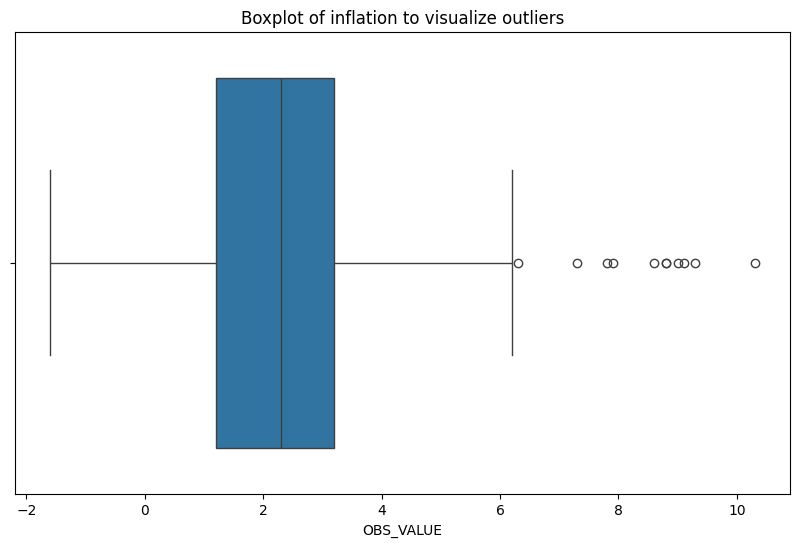

Finished cleaning inflation.
--------------------------------------------------

Cleaning indicator: gdp
Title: Gross Domestic Product
Frequency: Quarterly
Unit: Million EUR  

✅ No missing values in gdp.

✅ TIME_PERIOD format fixed for gdp.

Basic statistics for gdp:
                         TIME_PERIOD     OBS_VALUE
count                            122    122.000000
mean   2010-02-14 18:05:54.098360576  11041.304098
min              1995-01-01 00:00:00   3781.400000
25%              2002-07-24 00:00:00   6371.825000
50%              2010-02-15 00:00:00  10400.750000
75%              2017-09-08 00:00:00  14470.950000
max              2025-04-01 00:00:00  22941.100000
std                              NaN   5269.130419

Data type of OBS_VALUE for gdp: float64

✅ No outliers detected in gdp.

Finished cleaning gdp.
--------------------------------------------------

Cleaning indicator: consumption
Title: Final Consumption Expenditure
Frequency: Annual
Unit: Million EUR  

✅ No missing va

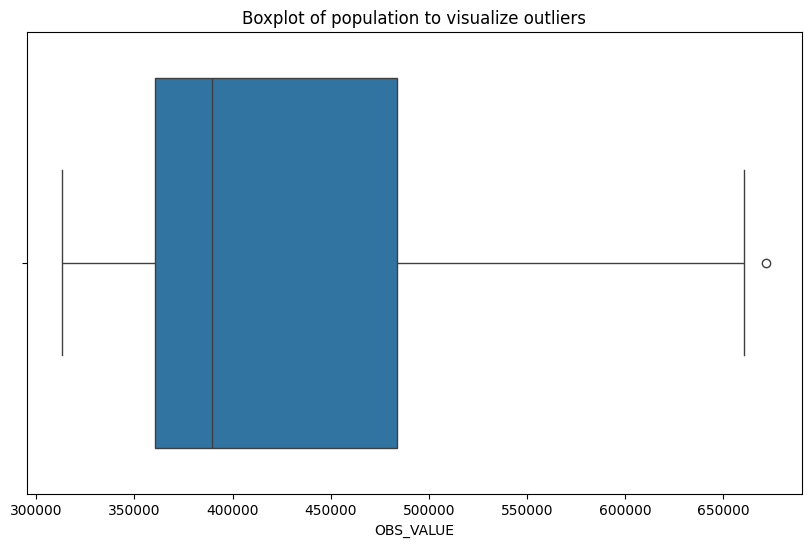

Finished cleaning population.
--------------------------------------------------

Cleaning indicator: emigration
Title: Emigration by Age and Sex
Frequency: Annual
Unit: Number of persons (count)  

✅ No missing values in emigration.

✅ TIME_PERIOD format fixed for emigration.

Basic statistics for emigration:
               TIME_PERIOD     OBS_VALUE
count                   34     34.000000
mean   2006-07-02 12:00:00  10023.147059
min    1990-01-01 00:00:00   5715.000000
25%    1998-04-02 06:00:00   7617.000000
50%    2006-07-02 12:00:00   9216.000000
75%    2014-10-01 18:00:00  12303.750000
max    2023-01-01 00:00:00  17227.000000
std                    NaN   3386.756767

Data type of OBS_VALUE for emigration: int64

✅ No outliers detected in emigration.

Finished cleaning emigration.
--------------------------------------------------

Cleaning indicator: immigration
Title: Immigration by Age Group, Sex and Citizenship
Frequency: Annual
Unit: Number of persons (count)  

✅ No missing 

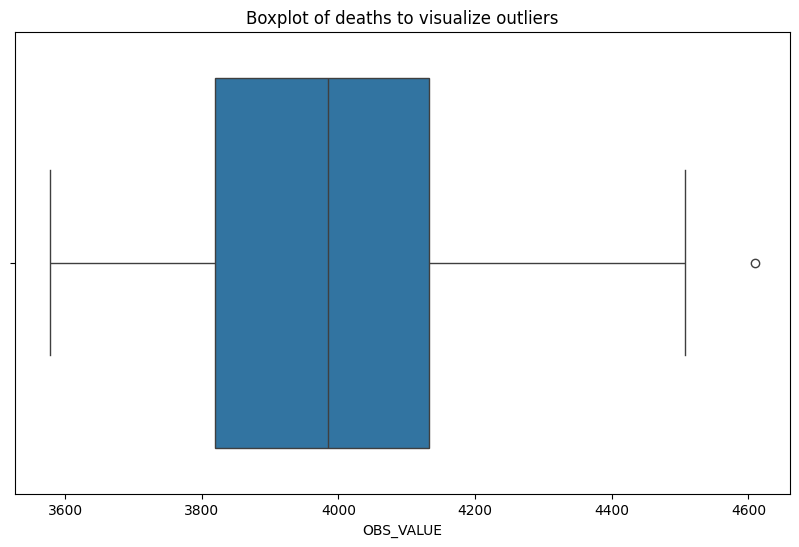

Finished cleaning deaths.
--------------------------------------------------

Cleaning indicator: house_prices
Title: House Price Index
Frequency: Quarterly
Unit: Index (2010 = 100)  

✅ No missing values in house_prices.

✅ TIME_PERIOD format fixed for house_prices.

Basic statistics for house_prices:
                         TIME_PERIOD   OBS_VALUE
count                             74   74.000000
mean   2016-02-15 06:09:43.783783680  145.801757
min              2007-01-01 00:00:00   90.670000
25%              2011-07-24 00:00:00  103.947500
50%              2016-02-15 12:00:00  129.820000
75%              2020-09-08 00:00:00  197.532500
max              2025-04-01 00:00:00  239.950000
std                              NaN   47.231958

Data type of OBS_VALUE for house_prices: float64

✅ No outliers detected in house_prices.

Finished cleaning house_prices.
--------------------------------------------------

Cleaning indicator: exports
Title: Exports of Goods and Services
Frequency: Qua

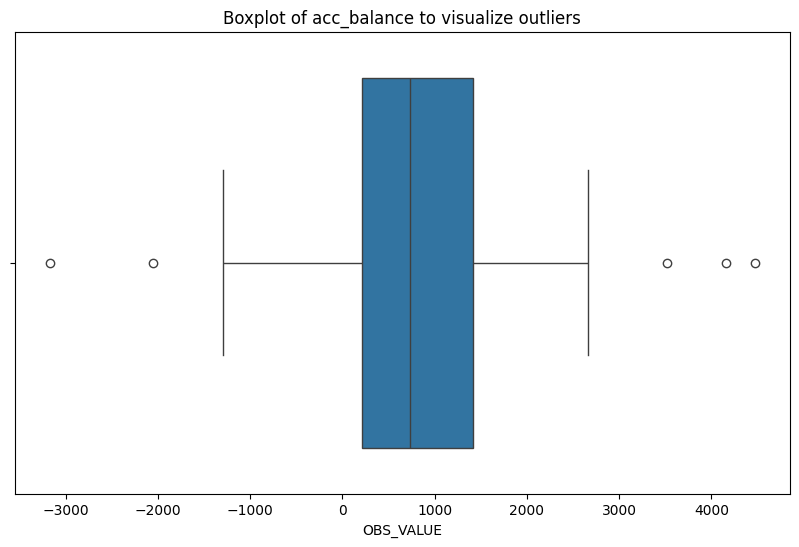

Finished cleaning acc_balance.
--------------------------------------------------



In [220]:
# Clean all indicators saving only for Luxembourg
cleaned_indicators = {}

for key in indicators.keys():
    cleaned_indicators[key] = clean_indicator(indicators[key], key, region='LU')

In [221]:
# Because Job Vacancies and House Prices does not have 20 years of data for Luxembourg, we will drop them from the analysis.
cleaned_indicators.pop('job_vacancies')
cleaned_indicators.pop('house_prices')

,Region,Date,house_prices
0,LU,2007-01-01,90.67
1,LU,2007-04-01,91.29
2,LU,2007-07-01,95.00
3,LU,2007-10-01,94.48
4,LU,2008-01-01,94.05
...,...,...,...
69,LU,2024-04-01,202.66
70,LU,2024-07-01,202.69
71,LU,2024-10-01,204.95
72,LU,2025-01-01,202.82


#### Cleaning Results:
 - No missing values were founded
 - Data Types are correct for each variable
 - Data is consistent
 - Found outliers:
    - **Inflation**: The outlier appeared because of Covid-19 in 2020. This outlier will remain.
    - **Deaths**: The outlier appeared because of Covid-19 in 2020. This outlier will remain.
    - **Population**: It appeared in the last year which indicates a fast increase in population. This outlier will remain.
    - **Account Balance**: Outliers in this dataset are real data points and appeared because high volatility of a small country.

### Data Transformation
 - **Aggregation**: Aggregate data to appropriate time intervals (e.g., annual, 
quarterly) for your analysis. 
 - **Normalization/Standardization**: Consider normalizing or standardizing 
variables if needed for comparison. 
 - **Feature Engineering**: Create new features from existing ones that might be 
relevant to your research questions.

In [222]:
### 1. How has the relationship between inflation and unemployment evolved in Luxembourg over the past 20 years?
# For this question, we will focus on the 'inflation' and 'unemployment' indicators.
# Aggregate the data to monthly frequency
question1 = pd.merge_asof(
    cleaned_indicators['inflation'].sort_values('Date'),
    cleaned_indicators['unemployment'].sort_values('Date'),
    on=['Date'],
    direction='backward'
)

# Filter data for the last 20 years
question1 = question1[question1['Date'] >= '2004-01-01']
question1.tail()

,Region_x,Date,inflation,Region_y,unemployment
340,LU,2025-05-01,2.1,LU,6.4
341,LU,2025-06-01,2.4,LU,6.2
342,LU,2025-07-01,2.6,LU,6.4
343,LU,2025-08-01,2.8,LU,6.3
344,LU,2025-09-01,3.1,LU,6.3


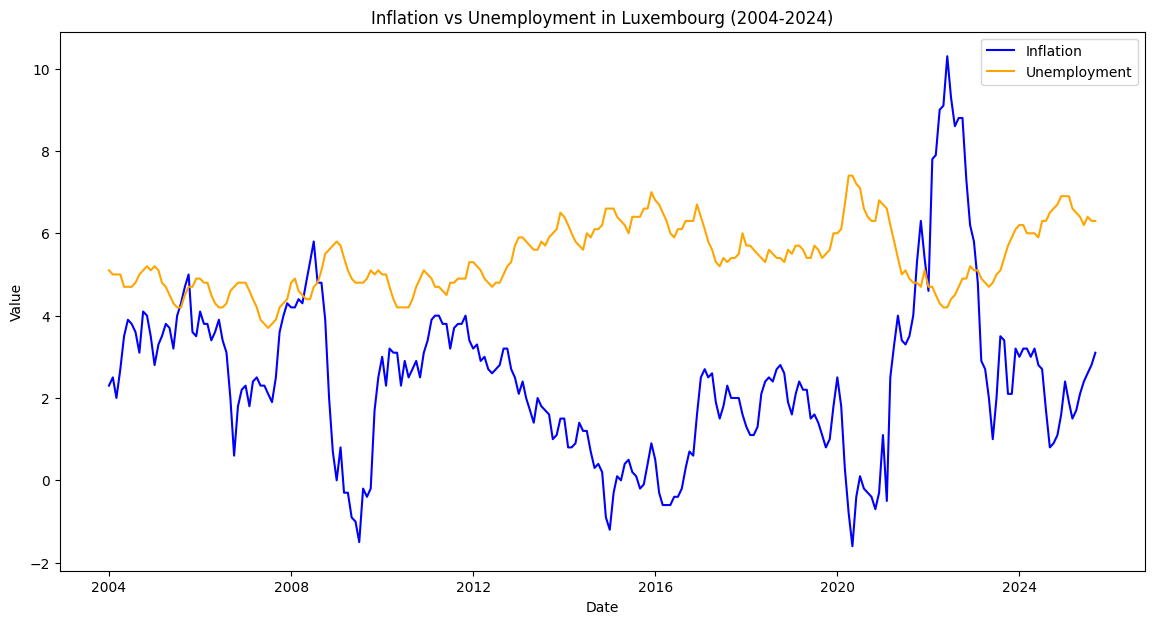

In [223]:
# Visualize the relationship between inflation and unemployment over time
plt.figure(figsize=(14, 7))
plt.plot(question1['Date'], question1['inflation'], label='Inflation', color='blue')
plt.plot(question1['Date'], question1['unemployment'], label='Unemployment', color='orange')
plt.title('Inflation vs Unemployment in Luxembourg (2004-2024)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

The plot reveals a negative correlation between inflation and the unemployment rate, suggesting that periods of higher inflation tend to coincide with lower unemployment levels, but still it is not a strong one.

For a better visualization, the variables need to be transformed in the same range.

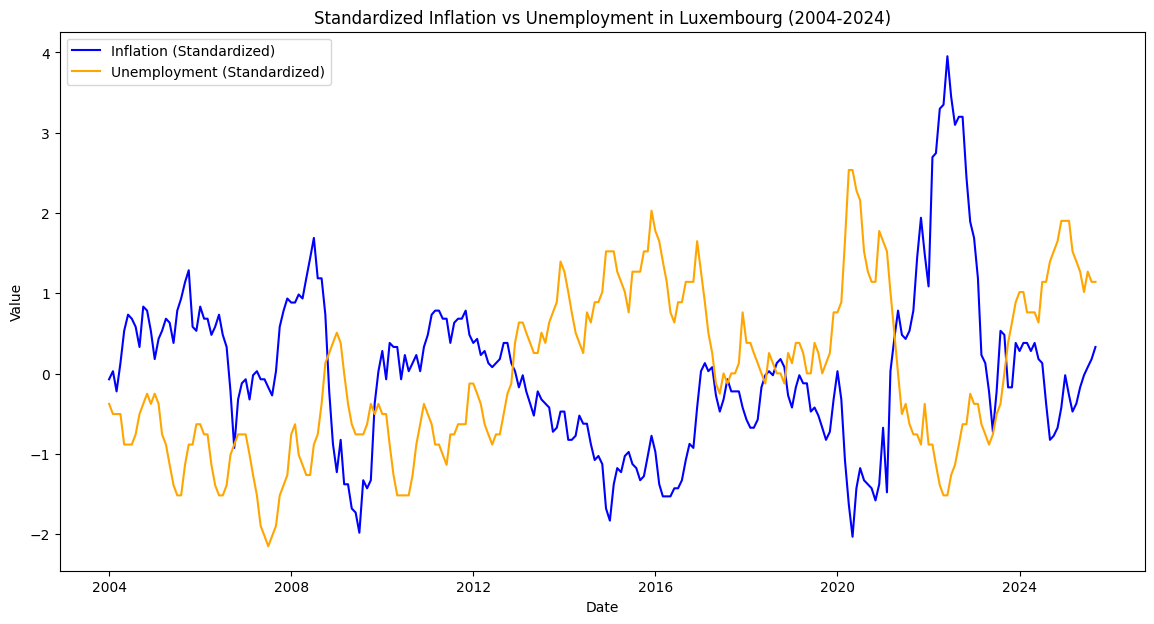

In [224]:
# Normalize the variables for better visualization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
question1[['inflation_scaled', 'unemployment_scaled']] = scaler.fit_transform(question1[['inflation', 'unemployment']])
# Visualize the standardized relationship between inflation and unemployment over time
plt.figure(figsize=(14, 7))
plt.plot(question1['Date'], question1['inflation_scaled'], label='Inflation (Standardized)', color='blue')
plt.plot(question1['Date'], question1['unemployment_scaled'], label='Unemployment (Standardized)', color='orange')
plt.title('Standardized Inflation vs Unemployment in Luxembourg (2004-2024)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [225]:
### 2. How does population life expectancy relate to GDP per capita growth in Luxembourg?
# For this question, we will focus on the 'life_expectancy', 'gdp', and 'population' indicators.
# Merge life expectancy, GDP, and population data
# Life Expectancy and Population are annual, while GDP is quarterly. We will align them to annual frequency by summerizing GDP to annual.
question2 = pd.merge_asof(
    cleaned_indicators['life_expectancy'].sort_values('Date'),
    cleaned_indicators['population'].sort_values('Date'),
    on=['Date'],
    direction='backward'
)

# Convert quarterly GDP to yearly by summing
gdp_yearly = cleaned_indicators['gdp'].copy()
gdp_yearly['Year'] = gdp_yearly['Date'].dt.year
gdp_yearly = gdp_yearly.groupby('Year')['gdp'].sum().reset_index()
gdp_yearly.rename(columns={'Year': 'Date'}, inplace=True)
gdp_yearly['Date'] = pd.to_datetime(gdp_yearly['Date'], format='%Y').dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

# Merge yearly GDP with question2
question2 = pd.merge_asof(
    question2.sort_values('Date'),
    gdp_yearly.sort_values('Date'),
    on=['Date'],
    direction='backward'
)

# Calculate GDP per capita
question2['gdp_per_capita'] = question2['gdp'] / question2['population']

question2.tail()


,Region_x,Date,life_expectancy,Region_y,population,gdp,gdp_per_capita
49,LU,2020-01-01,82.2,LU,626108.0,64499.2,0.103016
50,LU,2021-01-01,82.7,LU,634730.0,73039.5,0.115072
51,LU,2022-01-01,83.0,LU,645397.0,76731.2,0.118890
52,LU,2023-01-01,83.4,LU,660809.0,82115.5,0.124265
53,LU,2024-01-01,83.5,LU,672050.0,86180.3,0.128235


In [226]:
question2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Region_x         54 non-null     object        
 1   Date             54 non-null     datetime64[ns]
 2   life_expectancy  54 non-null     float64       
 3   Region_y         54 non-null     object        
 4   population       54 non-null     float64       
 5   gdp              30 non-null     float64       
 6   gdp_per_capita   30 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.1+ KB


In [227]:
# The gdp data is for the last 30 years, while life expectancy and population are for the last 54 years.
# So I will filter the data for the last 30 years to have all indicators aligned.
question2 = question2[question2['Date'] >= '1994-01-01']

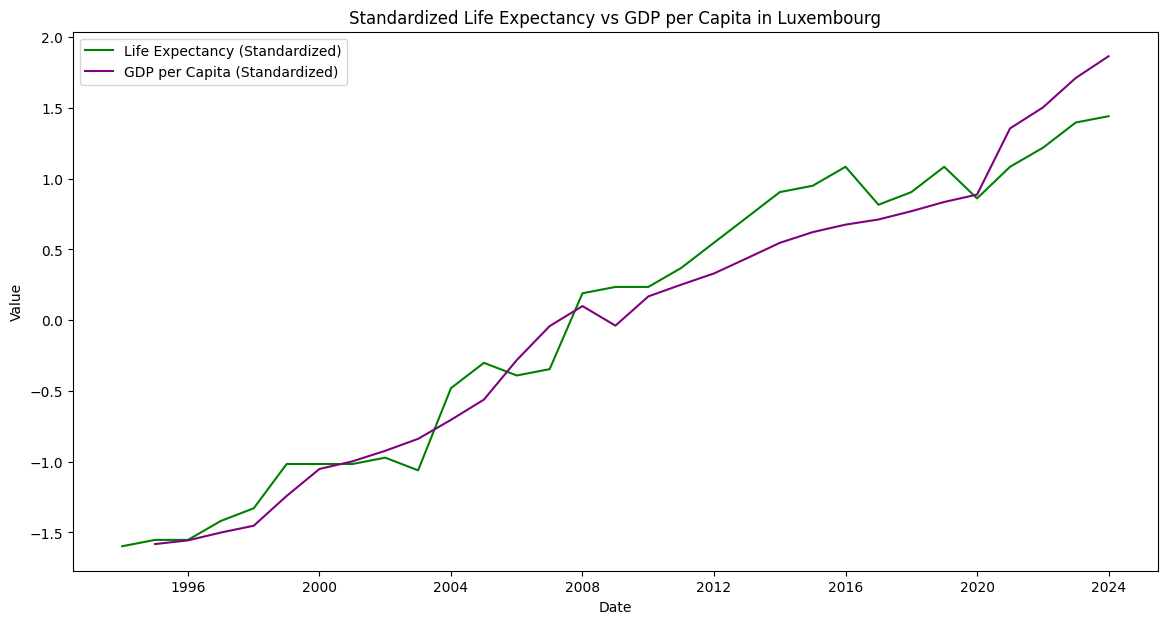

In [228]:
# Because the variables are in different scales, we will normalize them for better visualization.
question2[['life_expectancy_scaled', 'gdp_per_capita_scaled']] = scaler.fit_transform(question2[['life_expectancy', 'gdp_per_capita']])
# Visualize the relationship between life expectancy and GDP per capita over time
plt.figure(figsize=(14, 7))
plt.plot(question2['Date'], question2['life_expectancy_scaled'], label='Life Expectancy (Standardized)', color='green')
plt.plot(question2['Date'], question2['gdp_per_capita_scaled'], label='GDP per Capita (Standardized)', color='purple')
plt.title('Standardized Life Expectancy vs GDP per Capita in Luxembourg')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Both life expectancy and GDP per capita in Luxembourg show a consistent upward trend. This suggests a strong positive relationship between economic prosperity and health outcomes.

In [229]:
### 3. How do unemployment rates correlate with emigration patterns in Luxembourg?
# For this question, we will focus on the 'unemployment' and 'emigration' indicators.
# Merge unemployment and emigration data

# Unemployment is monthly, while emigration is annual. We will align them to annual frequency by taking the average unemployment rate of each year.
unemployment_yearly = cleaned_indicators['unemployment'].copy()

# Filter unemployment data from 1990 match emigration data
unemployment_yearly = unemployment_yearly[unemployment_yearly['Date'] >= '1990-01-01']
unemployment_yearly['Year'] = unemployment_yearly['Date'].dt.year
unemployment_yearly = unemployment_yearly.groupby('Year')['unemployment'].mean().reset_index()
unemployment_yearly.rename(columns={'Year': 'Date'}, inplace=True)
unemployment_yearly['Date'] = pd.to_datetime(unemployment_yearly['Date'], format='%Y').dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

question3 = pd.merge_asof(
    unemployment_yearly.sort_values('Date'),
    cleaned_indicators['emigration'].sort_values('Date'),
    on=['Date'],
    direction='backward'
)

# Merge population data
question3 = pd.merge_asof(
    question3.sort_values('Date'),
    cleaned_indicators['population'].sort_values('Date'),
    on=['Date'],
    direction='backward'
)

question3.head()


,Date,unemployment,Region_x,emigration,Region_y,population
0,1990-01-01,1.658333,LU,6339,LU,379300.0
1,1991-01-01,1.658333,LU,6740,LU,384400.0
2,1992-01-01,2.066667,LU,6440,LU,389600.0
3,1993-01-01,2.583333,LU,5826,LU,394750.0
4,1994-01-01,3.175000,LU,6141,LU,400200.0


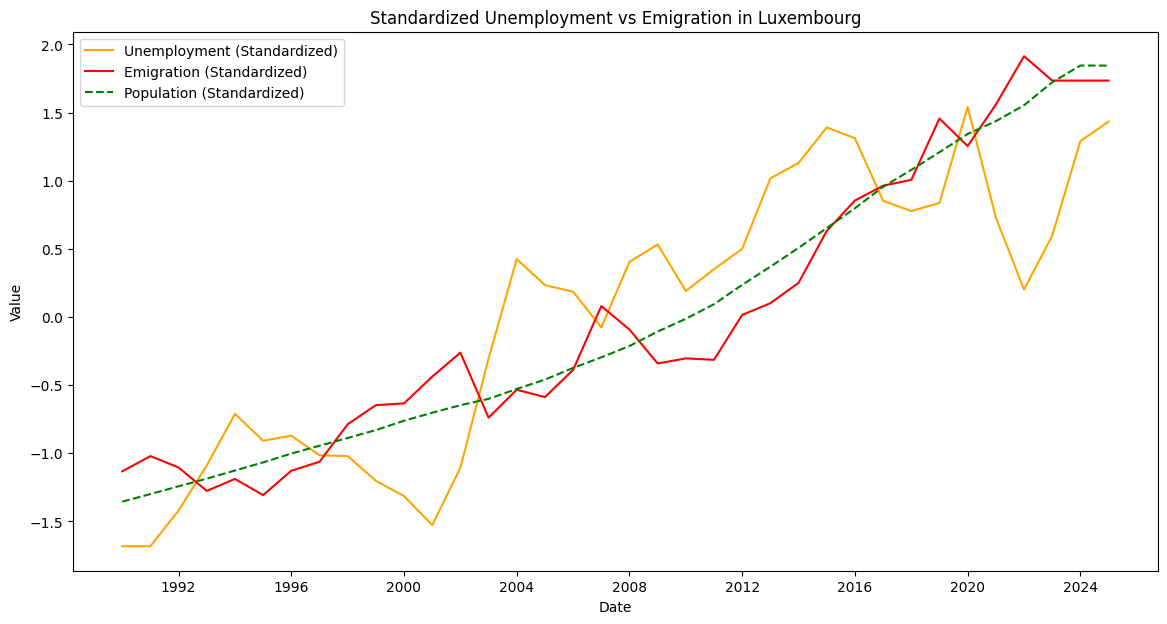

In [230]:
# Because unemployment rate is in percentage and emigration is in count, we will normalize them for better visualization.
question3[['unemployment_scaled', 'emigration_scaled', 'population_scaled']] = scaler.fit_transform(question3[['unemployment', 'emigration', 'population']])

# Visualize the relationship between unemployment and emigration over time
plt.figure(figsize=(14, 7))
plt.plot(question3['Date'], question3['unemployment_scaled'], label='Unemployment (Standardized)', color='orange')
plt.plot(question3['Date'], question3['emigration_scaled'], label='Emigration (Standardized)', color='red')
plt.plot(question3['Date'], question3['population_scaled'], label='Population (Standardized)', color='green', linestyle='--')
plt.title('Standardized Unemployment vs Emigration in Luxembourg')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

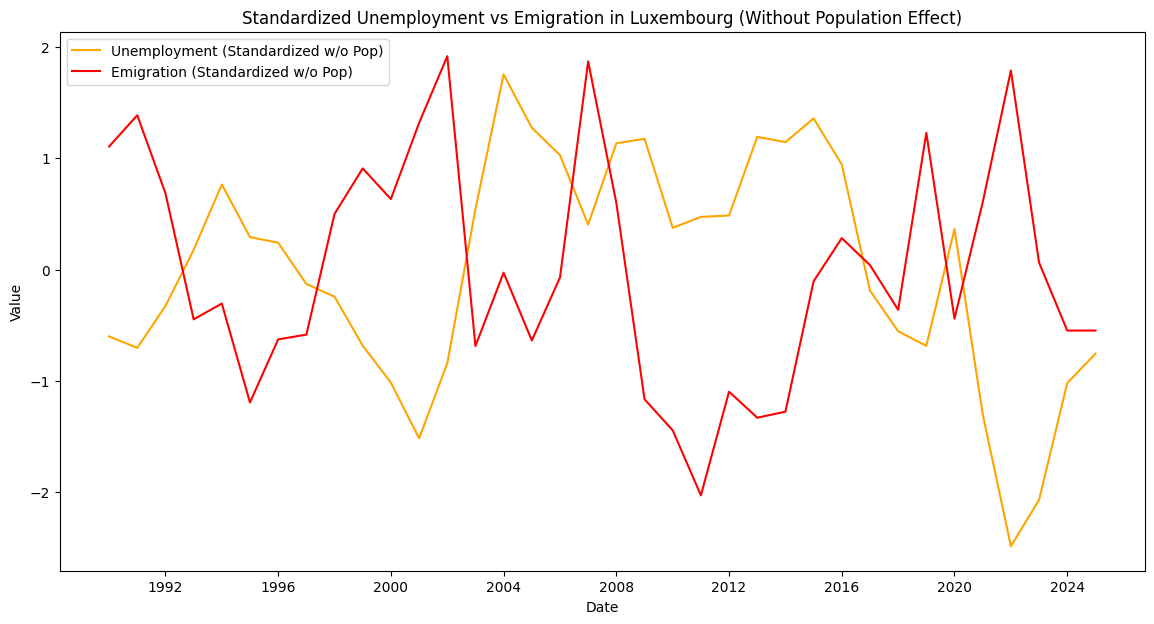

In [231]:
# Analysis of Unemployment and Emigration by substracting population effect
question3['unemployment_scaled_wo_pop'] = question3['unemployment_scaled'] - question3['population_scaled']
question3['emigration_scaled_wo_pop'] = question3['emigration_scaled'] - question3['population_scaled']

# Scale again after substraction
question3[['unemployment_scaled_wo_pop', 'emigration_scaled_wo_pop']] = scaler.fit_transform(question3[['unemployment_scaled_wo_pop', 'emigration_scaled_wo_pop']])

# Visualize the relationship between unemployment and emigration over time without population effect
plt.figure(figsize=(14, 7))
plt.plot(question3['Date'], question3['unemployment_scaled_wo_pop'], label='Unemployment (Standardized w/o Pop)', color='orange')
plt.plot(question3['Date'], question3['emigration_scaled_wo_pop'], label='Emigration (Standardized w/o Pop)', color='red')
plt.title('Standardized Unemployment vs Emigration in Luxembourg (Without Population Effect)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

It looks like there is a negative relationship between Unemployment and Emigration. But there is a but. Between 2010 and 2016 there is not a visible correlation which might mean that Luxembourg had a good management of population.

### Exploratory Data Analysis (EDA) & Visualization (40% of Grade) 
 - Univariate Analysis: Explore the distribution of each selected indicator individually 
using appropriate descriptive statistics and visualizations (histograms, box plots, 
density plots). 
 - Bivariate Analysis: Investigate relationships between pairs of indicators using: 
    - Scatter Plots: Visualize correlations. 
    - Correlation: Calculate and visualize correlation between variables. 
    - Time Series Plots: Analyze trends over time for individual indicators and 
combinations. 
 - Multivariate Analysis (Optional): If appropriate, explore relationships between 
multiple indicators using techniques like: 
    - Pair Plots: Visualize pairwise relationships among several variables. 
    - Heatmaps: Display correlation matrices or other multivariate data. 
    - Visualization Best Practices: Create clear, informative, and visually appealing 
visualizations with appropriate labels, titles, and legends. Use color effectively to 
highlight key findings. 
 - Interpretation: Provide insightful interpretations of your EDA results. What patterns, 
trends, anomalies, or relationships did you discover? 

#### Univariate Analysis

In [232]:
# Function to explore the distribution of a selected indicator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def explore_indicator_distribution(data, indicator_name, title=None):
    """
    Explore the distribution of a selected indicator using descriptive statistics 
    and visualizations (histograms, box plots, density plots).
    """
    
    if indicator_name not in data.columns:
        raise ValueError(f"Indicator '{indicator_name}' not found in data columns")
    
    # Extract the data
    series = data[indicator_name].dropna()
    
    if len(series) == 0:
        raise ValueError(f"No valid data for indicator '{indicator_name}'")
    
    # Set title
    if title is None:
        title = f"Distribution Analysis: {indicator_name}"
    
    # ============ DESCRIPTIVE STATISTICS ============
    stats_dict = {
        'Count': len(series),
        'Mean': series.mean(),
        'Median': series.median(),
        'Std Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Q1 (25%)': series.quantile(0.25),
        'Q3 (75%)': series.quantile(0.75),
        'IQR': series.quantile(0.75) - series.quantile(0.25),
        'Skewness': series.skew(),
        'Kurtosis': series.kurtosis(),
        'Coefficient of Variation': (series.std() / series.mean()) if series.mean() != 0 else np.nan
    }
    
    # ============ VISUALIZATIONS ============
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(title, fontsize=16, fontweight='bold', y=1.00)
    
    # 1. Histogram with KDE
    ax1 = axes[0, 0]
    ax1.hist(series, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
    series.plot(kind='kde', ax=ax1, color='red', linewidth=2, label='KDE')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Density')
    ax1.set_title('Histogram with Kernel Density Estimate')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Box Plot
    ax2 = axes[0, 1]
    bp = ax2.boxplot(series, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][0].set_alpha(0.7)
    for whisker in bp['whiskers']:
        whisker.set(linewidth=1.5)
    for cap in bp['caps']:
        cap.set(linewidth=1.5)
    ax2.set_ylabel('Value')
    ax2.set_title('Box Plot')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 3. Density Plot
    ax3 = axes[1, 0]
    series.plot(kind='density', ax=ax3, color='purple', linewidth=2)
    ax3.axvline(series.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {series.mean():.2f}')
    ax3.axvline(series.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {series.median():.2f}')
    ax3.set_xlabel('Value')
    ax3.set_ylabel('Density')
    ax3.set_title('Density Plot with Mean & Median')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Q-Q Plot (for normality assessment)
    ax4 = axes[1, 1]
    stats.probplot(series, dist="norm", plot=ax4)
    ax4.set_title('Q-Q Plot (Normality Assessment)')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ============ PRINT STATISTICS ============
    print(f"\n{'='*60}")
    print(f"DESCRIPTIVE STATISTICS: {indicator_name}")
    print(f"{'='*60}")
    print(f"\nCentral Tendency:")
    print(f"  Mean:                 {stats_dict['Mean']:.4f}")
    print(f"  Median:               {stats_dict['Median']:.4f}")
    print(f"  Mode:                 {series.mode().values[0] if len(series.mode()) > 0 else 'N/A'}")
    
    print(f"\nSpread:")
    print(f"  Std Dev:              {stats_dict['Std Dev']:.4f}")
    print(f"  Variance:             {series.var():.4f}")
    print(f"  Range:                {stats_dict['Max'] - stats_dict['Min']:.4f}")
    print(f"  IQR:                  {stats_dict['IQR']:.4f}")
    print(f"  Coefficient of Var:   {stats_dict['Coefficient of Variation']:.4f}")
    
    print(f"\nExtreme Values:")
    print(f"  Min:                  {stats_dict['Min']:.4f}")
    print(f"  Max:                  {stats_dict['Max']:.4f}")
    print(f"  Q1 (25th percentile): {stats_dict['Q1 (25%)']:.4f}")
    print(f"  Q3 (75th percentile): {stats_dict['Q3 (75%)']:.4f}")
    
    print(f"\nShape:")
    print(f"  Skewness:             {stats_dict['Skewness']:.4f}")
    if abs(stats_dict['Skewness']) < 0.5:
        skew_interpretation = "approximately symmetric"
    elif stats_dict['Skewness'] > 0:
        skew_interpretation = "right-skewed (positive skew)"
    else:
        skew_interpretation = "left-skewed (negative skew)"
    print(f"    → {skew_interpretation}")
    
    print(f"  Kurtosis:             {stats_dict['Kurtosis']:.4f}")
    if abs(stats_dict['Kurtosis']) < 0.5:
        kurt_interpretation = "approximately normal (mesokurtic)"
    elif stats_dict['Kurtosis'] > 0:
        kurt_interpretation = "heavy-tailed (leptokurtic)"
    else:
        kurt_interpretation = "light-tailed (platykurtic)"
    print(f"    → {kurt_interpretation}")
    
    print(f"\nData Count:")
    print(f"  Total observations:   {stats_dict['Count']}")
    print(f"  Missing values:       {data[indicator_name].isna().sum()}")
    
    # Normality test
    _, p_value = stats.normaltest(series)
    print(f"\nNormality Test (D'Agostino-Pearson):")
    print(f"  p-value:              {p_value:.4f}")
    if p_value > 0.05:
        print(f"    → Data appears approximately normal (p > 0.05)")
    else:
        print(f"    → Data does NOT appear normal (p < 0.05)")
    
    print(f"{'='*60}\n")
    
    return stats_dict

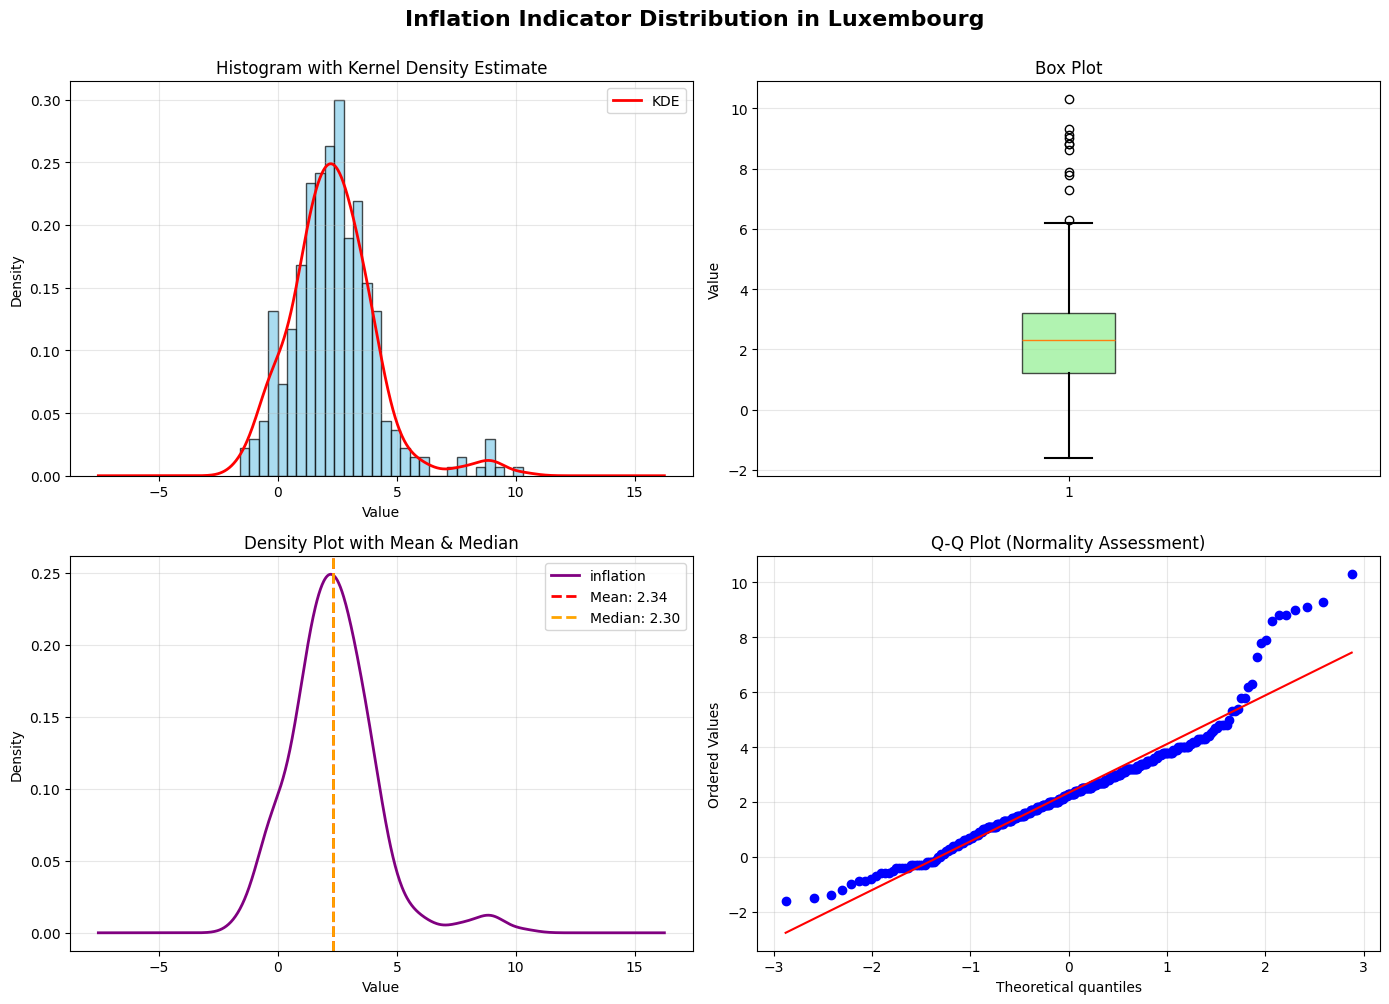


DESCRIPTIVE STATISTICS: inflation

Central Tendency:
  Mean:                 2.3368
  Median:               2.3000
  Mode:                 2.5

Spread:
  Std Dev:              1.8268
  Variance:             3.3372
  Range:                11.9000
  IQR:                  2.0000
  Coefficient of Var:   0.7818

Extreme Values:
  Min:                  -1.6000
  Max:                  10.3000
  Q1 (25th percentile): 1.2000
  Q3 (75th percentile): 3.2000

Shape:
  Skewness:             1.0672
    → right-skewed (positive skew)
  Kurtosis:             2.9699
    → heavy-tailed (leptokurtic)

Data Count:
  Total observations:   345
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.0000
    → Data does NOT appear normal (p < 0.05)



In [233]:
# Analysis of the Inflation indicator distribution
inflation_stats = explore_indicator_distribution(cleaned_indicators['inflation'], 'inflation', title='Inflation Indicator Distribution in Luxembourg')

 Luxembourg's inflation is well-anchored around 2.3%, mean value being 2.34%, median - 2.3% and IQR - 2%. But there is a risk of deflation (min - -1.6%) and periods of very high inflation rate (10.3%) during pandemic period. Because of that P-value is 0 which indicates that data is not normal.

 The distribution suggests Luxembourg has a stable, target-tracking inflation regime interrupted by periodic crisis-driven spikes—a healthy but not immune economy.

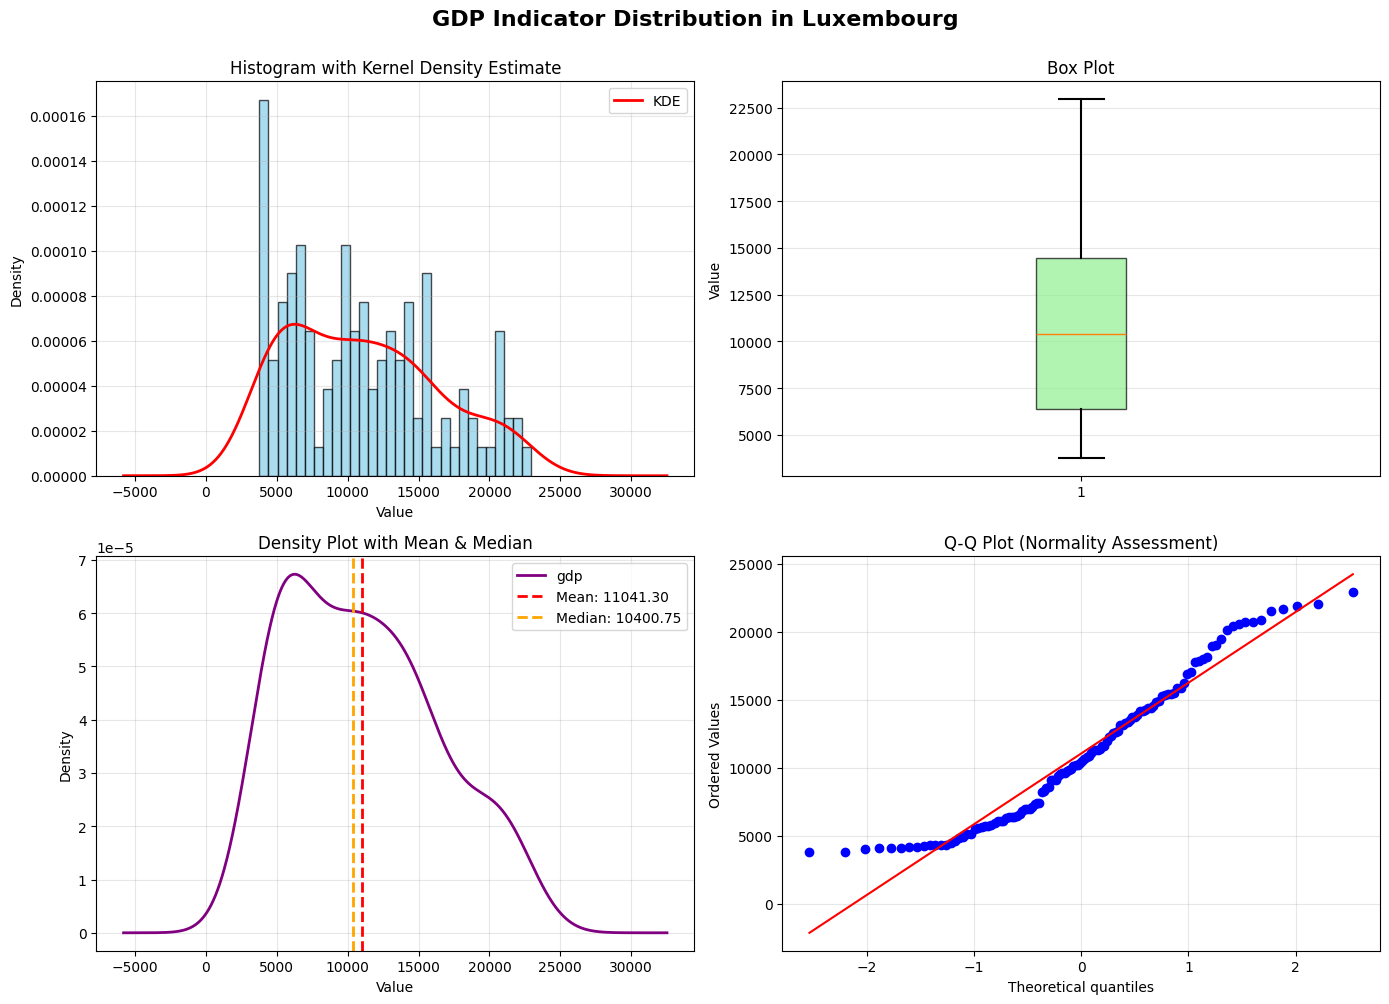


DESCRIPTIVE STATISTICS: gdp

Central Tendency:
  Mean:                 11041.3041
  Median:               10400.7500
  Mode:                 3781.4

Spread:
  Std Dev:              5269.1304
  Variance:             27763735.3708
  Range:                19159.7000
  IQR:                  8099.1250
  Coefficient of Var:   0.4772

Extreme Values:
  Min:                  3781.4000
  Max:                  22941.1000
  Q1 (25th percentile): 6371.8250
  Q3 (75th percentile): 14470.9500

Shape:
  Skewness:             0.4595
    → approximately symmetric
  Kurtosis:             -0.7851
    → light-tailed (platykurtic)

Data Count:
  Total observations:   122
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.0026
    → Data does NOT appear normal (p < 0.05)



In [234]:
# Analysis of the GDP indicator distribution
gdp_stats = explore_indicator_distribution(cleaned_indicators['gdp'], 'gdp', title='GDP Indicator Distribution in Luxembourg')

Luxembourg has experienced ~6x GDP growth (from 3,781 to 22,941 across the observation period). Distribution is light-tailed meaning extreme positive growth is rare, but so are crashes. The clean box plot and near-normal distribution suggest a stable, well-managed economy.

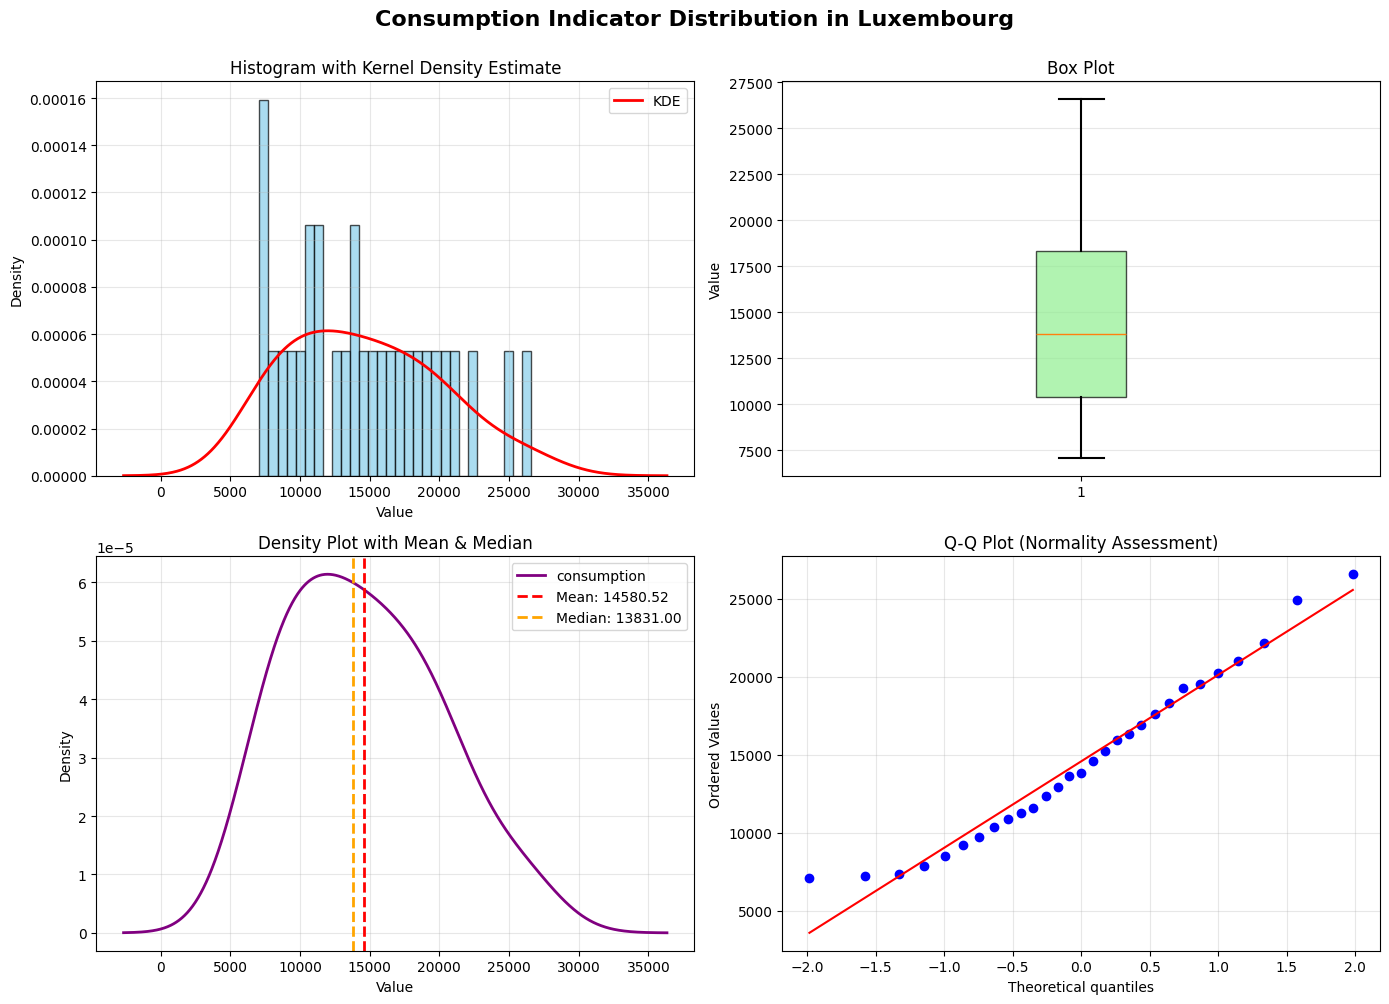


DESCRIPTIVE STATISTICS: consumption

Central Tendency:
  Mean:                 14580.5172
  Median:               13831.0000
  Mode:                 7086

Spread:
  Std Dev:              5410.1190
  Variance:             29269387.4015
  Range:                19501.0000
  IQR:                  7943.0000
  Coefficient of Var:   0.3711

Extreme Values:
  Min:                  7086.0000
  Max:                  26587.0000
  Q1 (25th percentile): 10400.0000
  Q3 (75th percentile): 18343.0000

Shape:
  Skewness:             0.4490
    → approximately symmetric
  Kurtosis:             -0.5638
    → light-tailed (platykurtic)

Data Count:
  Total observations:   29
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.4564
    → Data appears approximately normal (p > 0.05)



In [235]:
# Analysis of the consumption indicator distribution
consumption_stats = explore_indicator_distribution(cleaned_indicators['consumption'], 'consumption', title='Consumption Indicator Distribution in Luxembourg')

Consumption has grown ~3.9x over the observation period (7,000 → 26,500). It shows steady, predictable growth mirroring economic expansion, with minimal shocks or outliers. The near-normal distribution means consumption can be reliably forecasted and modeled. 

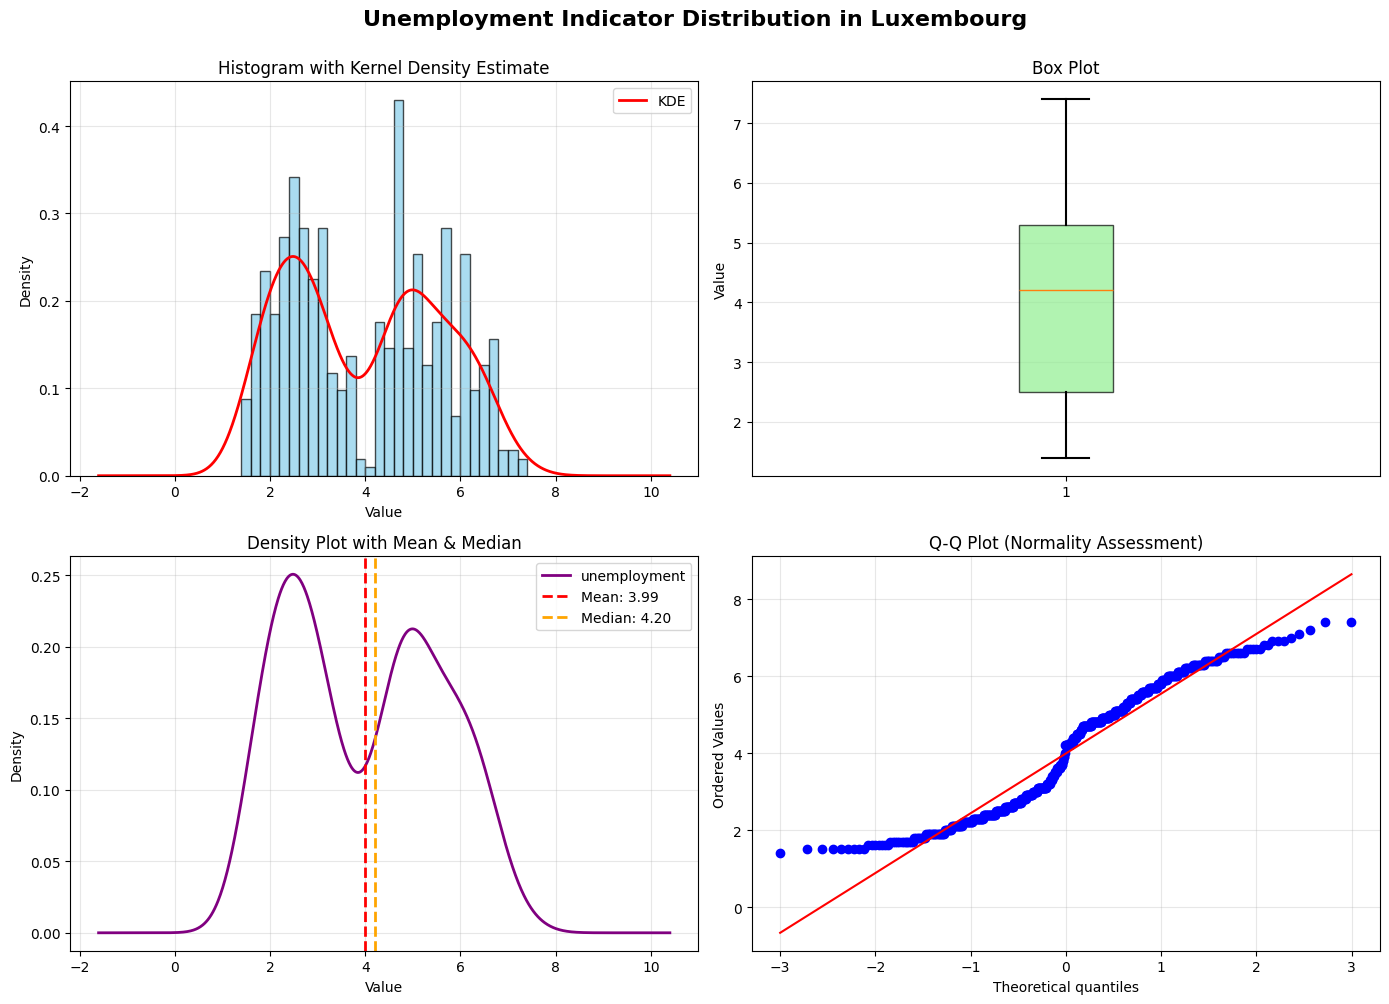


DESCRIPTIVE STATISTICS: unemployment

Central Tendency:
  Mean:                 3.9889
  Median:               4.2000
  Mode:                 4.8

Spread:
  Std Dev:              1.5944
  Variance:             2.5422
  Range:                6.0000
  IQR:                  2.8000
  Coefficient of Var:   0.3997

Extreme Values:
  Min:                  1.4000
  Max:                  7.4000
  Q1 (25th percentile): 2.5000
  Q3 (75th percentile): 5.3000

Shape:
  Skewness:             0.1365
    → approximately symmetric
  Kurtosis:             -1.2965
    → light-tailed (platykurtic)

Data Count:
  Total observations:   512
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.0000
    → Data does NOT appear normal (p < 0.05)



In [236]:
# Analysis of unemployment indicator distribution
unemployment_stats = explore_indicator_distribution(cleaned_indicators['unemployment'], 'unemployment', title='Unemployment Indicator Distribution in Luxembourg')

Luxembourg normally has unemployment around 4-4.8%. But there are distinct periods of both lower (1-3%) and higher (6-7%) unemployment. 

Histogram shows TWO distinct peaks:
 - First peak: Around 2-3% (left side)
 - Second peak: Around 5-6% (right side)
 - A valley in between around 4%

            ||     
            \/     

Luxembourg has TWO distinct unemployment regimes:
 - Low unemployment regime (1-3%): Normal times, tight labor market
 - High unemployment regime (5-7%): Crisis periods or structural shifts
 - Few observations in the 3.5-4.5% range (the valley)

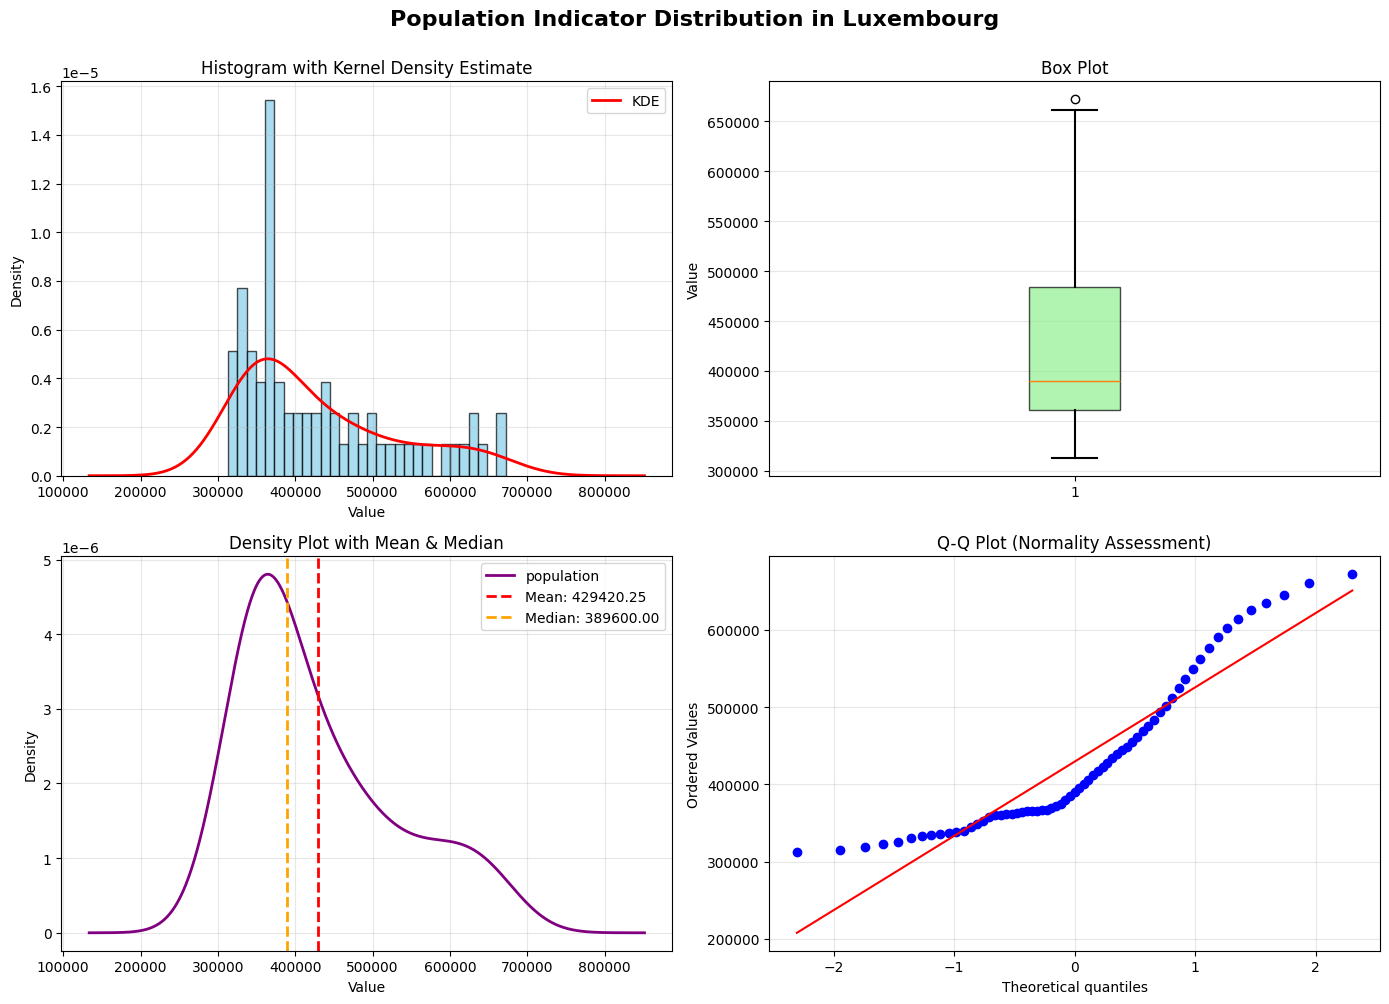


DESCRIPTIVE STATISTICS: population

Central Tendency:
  Mean:                 429420.2462
  Median:               389600.0000
  Mode:                 313050.0

Spread:
  Std Dev:              100279.0589
  Variance:             10055889656.9072
  Range:                359000.0000
  IQR:                  123299.0000
  Coefficient of Var:   0.2335

Extreme Values:
  Min:                  313050.0000
  Max:                  672050.0000
  Q1 (25th percentile): 360500.0000
  Q3 (75th percentile): 483799.0000

Shape:
  Skewness:             0.9755
    → right-skewed (positive skew)
  Kurtosis:             -0.1711
    → approximately normal (mesokurtic)

Data Count:
  Total observations:   65
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.0103
    → Data does NOT appear normal (p < 0.05)



In [237]:
# Analysis of the population indicator distribution
population_stats = explore_indicator_distribution(cleaned_indicators['population'], 'population', title='Population Indicator Distribution in Luxembourg')

Mean = 429420 | Median = 389600 -> Recent years have much higher population than historical average. Luxembourg's population distribution reveals a steady, consistent 2.14x growth story over 30+ years, with acceleration in the most recent decade.

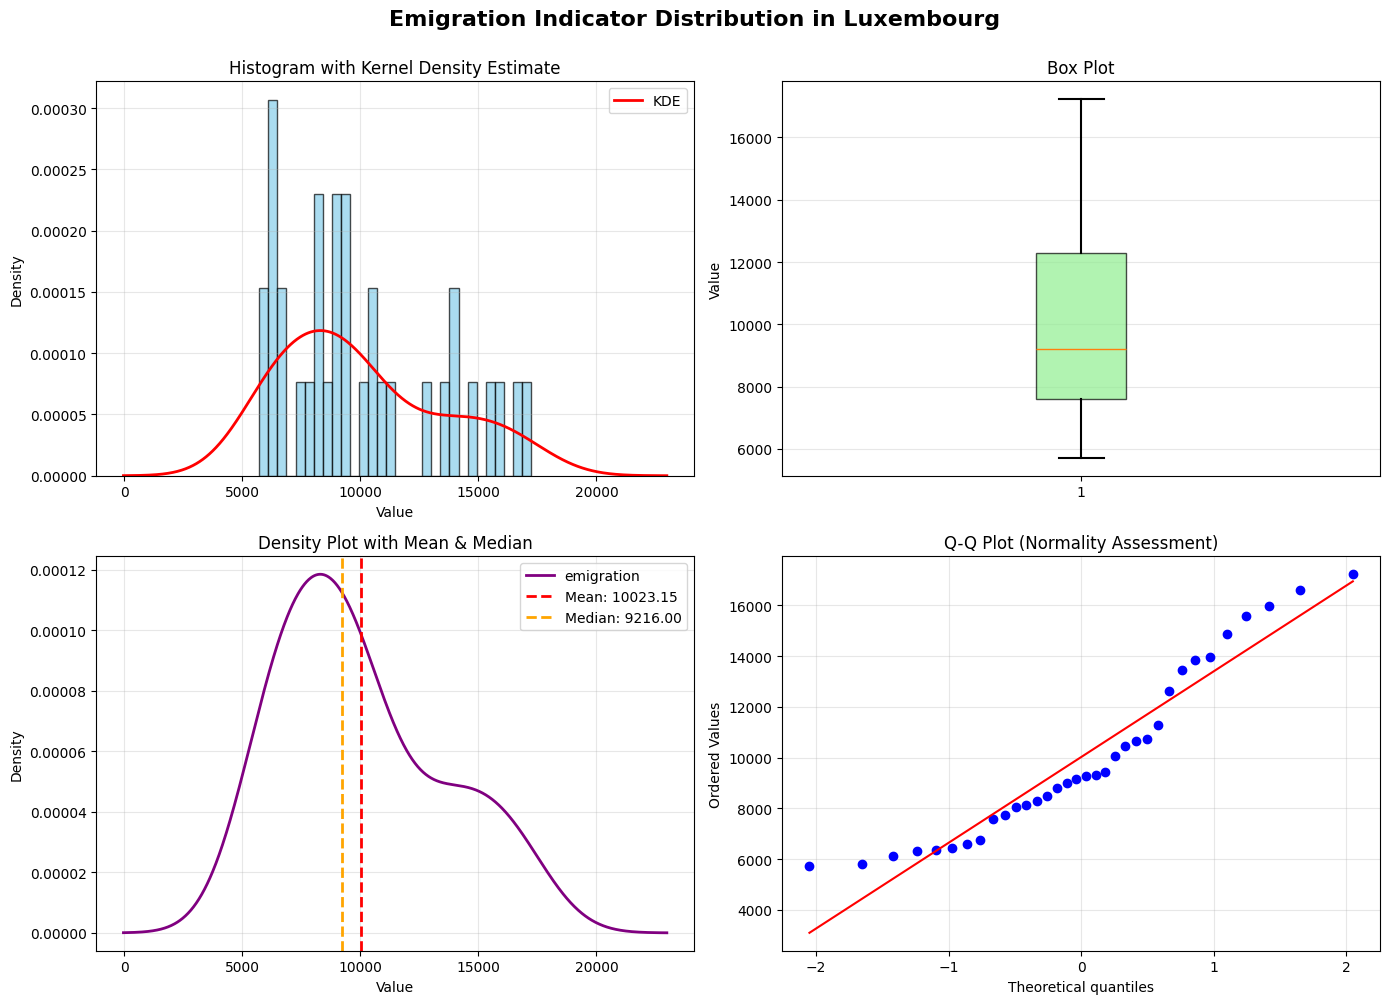


DESCRIPTIVE STATISTICS: emigration

Central Tendency:
  Mean:                 10023.1471
  Median:               9216.0000
  Mode:                 5715

Spread:
  Std Dev:              3386.7568
  Variance:             11470121.4020
  Range:                11512.0000
  IQR:                  4686.7500
  Coefficient of Var:   0.3379

Extreme Values:
  Min:                  5715.0000
  Max:                  17227.0000
  Q1 (25th percentile): 7617.0000
  Q3 (75th percentile): 12303.7500

Shape:
  Skewness:             0.6987
    → right-skewed (positive skew)
  Kurtosis:             -0.6060
    → light-tailed (platykurtic)

Data Count:
  Total observations:   34
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.1599
    → Data appears approximately normal (p > 0.05)



In [238]:
# Analysis of the emigration indicator distribution
emigration_stats = explore_indicator_distribution(cleaned_indicators['emigration'], 'emigration', title='Emigration Indicator Distribution in Luxembourg')

Mean = 10,023.15 | Median = 9,216.00 — Emigration averages ~10,000 people annually with a small upward bias, indicating recent years have slightly higher emigration than historical average.

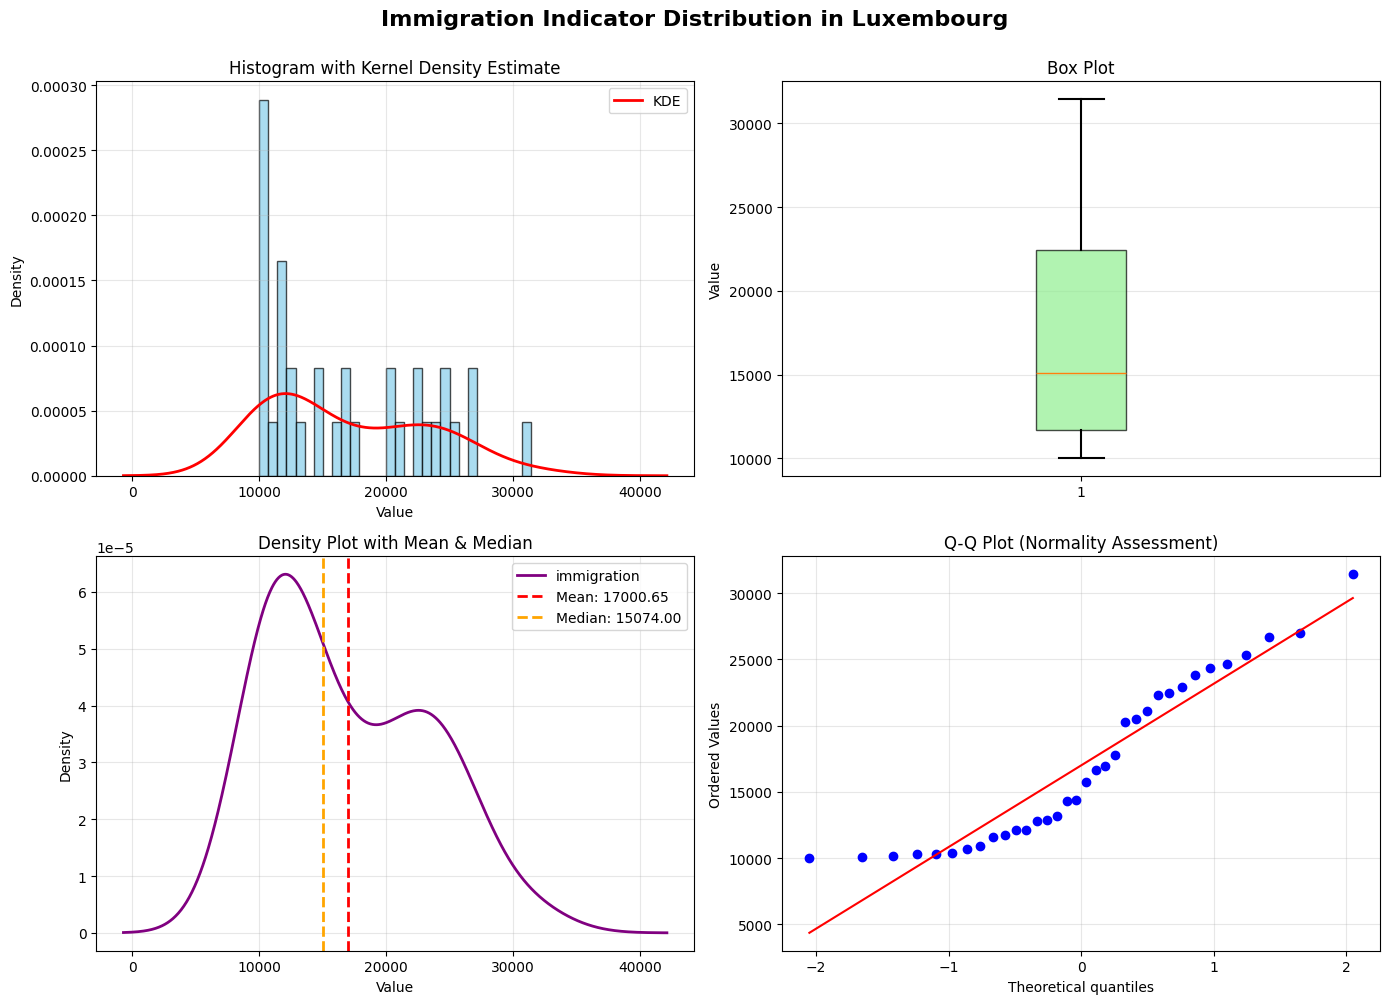


DESCRIPTIVE STATISTICS: immigration

Central Tendency:
  Mean:                 17000.6471
  Median:               15074.0000
  Mode:                 10027

Spread:
  Std Dev:              6240.5468
  Variance:             38944424.8414
  Range:                21406.0000
  IQR:                  10786.7500
  Coefficient of Var:   0.3671

Extreme Values:
  Min:                  10027.0000
  Max:                  31433.0000
  Q1 (25th percentile): 11663.7500
  Q3 (75th percentile): 22450.5000

Shape:
  Skewness:             0.5541
    → right-skewed (positive skew)
  Kurtosis:             -0.9413
    → light-tailed (platykurtic)

Data Count:
  Total observations:   34
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.0949
    → Data appears approximately normal (p > 0.05)



In [239]:
# Analysis of the Immigration indicator distribution
immigration_stats = explore_indicator_distribution(cleaned_indicators['immigration'], 'immigration', title='Immigration Indicator Distribution in Luxembourg')

Immigration averages ~17,000 people annually, with mean 12.8% higher than median, indicating recent years have dramatically higher immigration than historical baseline. Immigration passes normality test, making it as predictable and statistically reliable as emigration, enabling robust forecasting of migration flows.

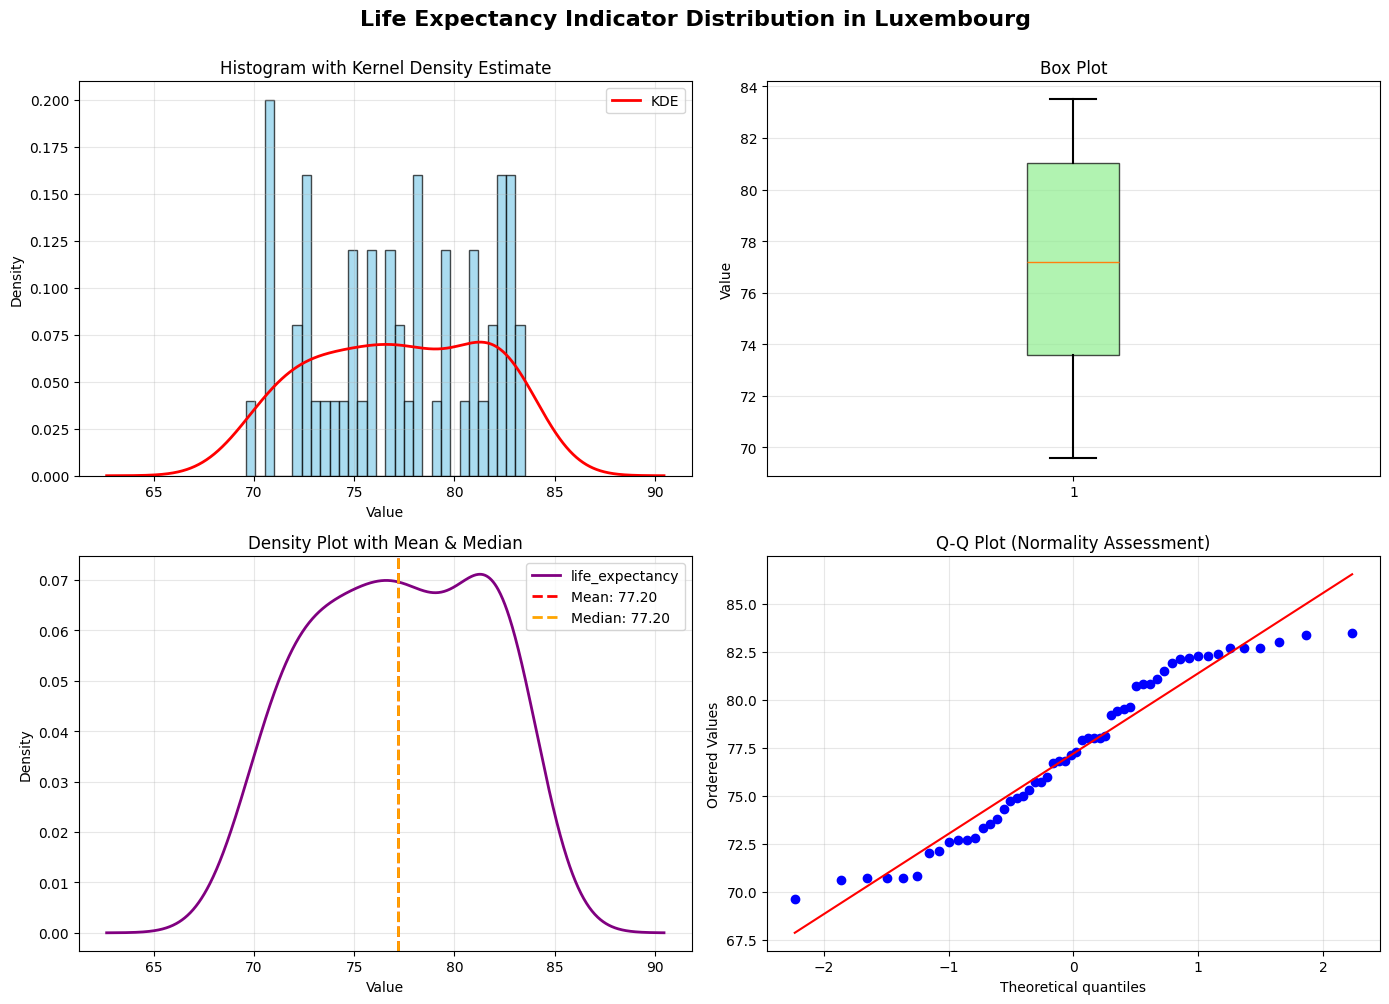


DESCRIPTIVE STATISTICS: life_expectancy

Central Tendency:
  Mean:                 77.1981
  Median:               77.2000
  Mode:                 70.7

Spread:
  Std Dev:              4.1803
  Variance:             17.4745
  Range:                13.9000
  IQR:                  7.4500
  Coefficient of Var:   0.0541

Extreme Values:
  Min:                  69.6000
  Max:                  83.5000
  Q1 (25th percentile): 73.5750
  Q3 (75th percentile): 81.0250

Shape:
  Skewness:             -0.1115
    → approximately symmetric
  Kurtosis:             -1.2457
    → light-tailed (platykurtic)

Data Count:
  Total observations:   54
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.0004
    → Data does NOT appear normal (p < 0.05)



In [240]:
# Analysis of the life expectancy indicator distribution
life_expectancy_stats = explore_indicator_distribution(cleaned_indicators['life_expectancy'], 'life_expectancy', title='Life Expectancy Indicator Distribution in Luxembourg')

Mean = 77.1981 | Median = 77.2000

Mean and median are virtually identical. Life expectancy is remarkably stable when growing with no fast upward or downward movement over time.

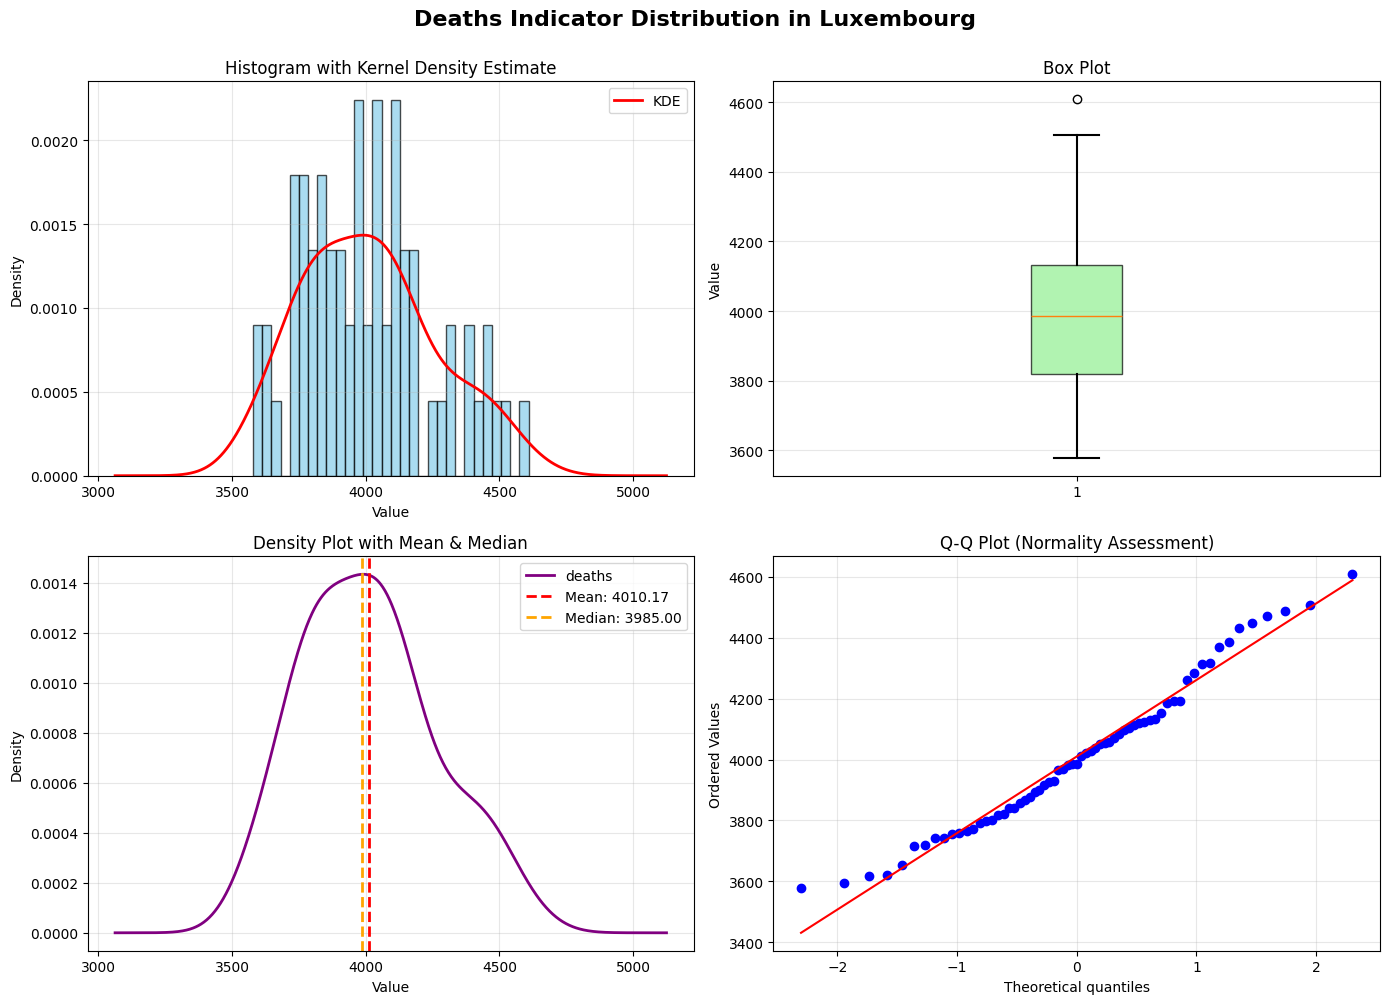


DESCRIPTIVE STATISTICS: deaths

Central Tendency:
  Mean:                 4010.1692
  Median:               3985.0000
  Mode:                 3744

Spread:
  Std Dev:              248.7887
  Variance:             61895.7990
  Range:                1031.0000
  IQR:                  314.0000
  Coefficient of Var:   0.0620

Extreme Values:
  Min:                  3578.0000
  Max:                  4609.0000
  Q1 (25th percentile): 3819.0000
  Q3 (75th percentile): 4133.0000

Shape:
  Skewness:             0.4151
    → approximately symmetric
  Kurtosis:             -0.4403
    → approximately normal (mesokurtic)

Data Count:
  Total observations:   65
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.2744
    → Data appears approximately normal (p > 0.05)



In [241]:
# Analysis of the deaths indicator distribution
deaths_stats = explore_indicator_distribution(cleaned_indicators['deaths'], 'deaths', title='Deaths Indicator Distribution in Luxembourg')

The Deaths seems to be Normal, only a bump appeared because of the Covid-19 influence.

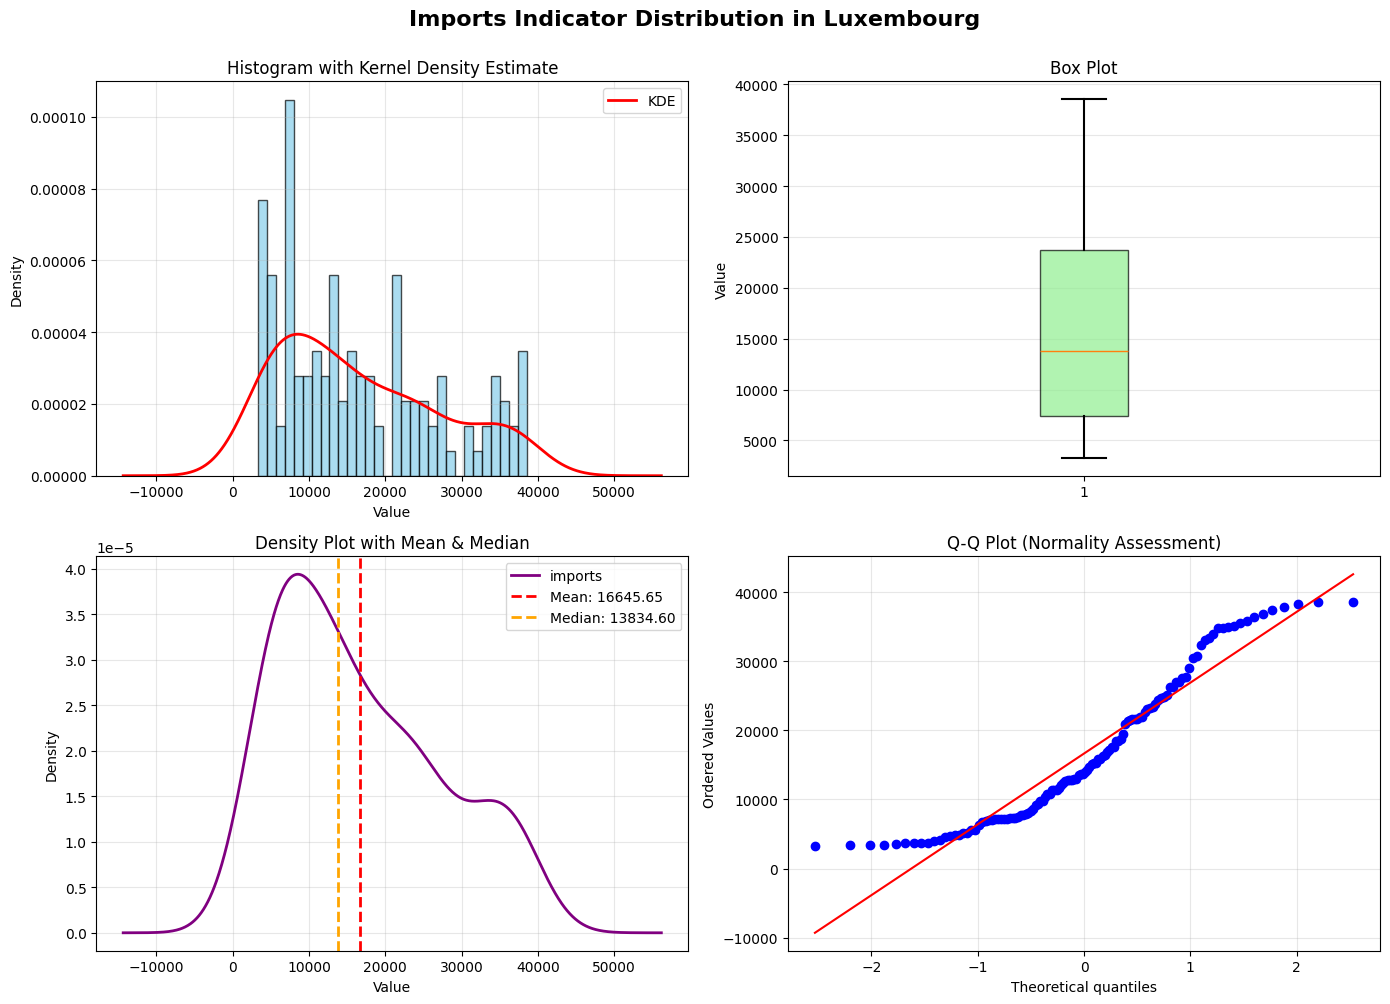


DESCRIPTIVE STATISTICS: imports

Central Tendency:
  Mean:                 16645.6508
  Median:               13834.6000
  Mode:                 3286.4

Spread:
  Std Dev:              10522.4185
  Variance:             110721290.2688
  Range:                35250.1000
  IQR:                  16344.9750
  Coefficient of Var:   0.6321

Extreme Values:
  Min:                  3286.4000
  Max:                  38536.5000
  Q1 (25th percentile): 7357.9250
  Q3 (75th percentile): 23702.9000

Shape:
  Skewness:             0.6074
    → right-skewed (positive skew)
  Kurtosis:             -0.7921
    → light-tailed (platykurtic)

Data Count:
  Total observations:   122
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.0006
    → Data does NOT appear normal (p < 0.05)



In [242]:
# Analysis of the imports indicator distribution
imports_stats = explore_indicator_distribution(cleaned_indicators['imports'], 'imports', title='Imports Indicator Distribution in Luxembourg')

Mean - 16645 > Median - 13834 - indicates a fast growing in Imports.

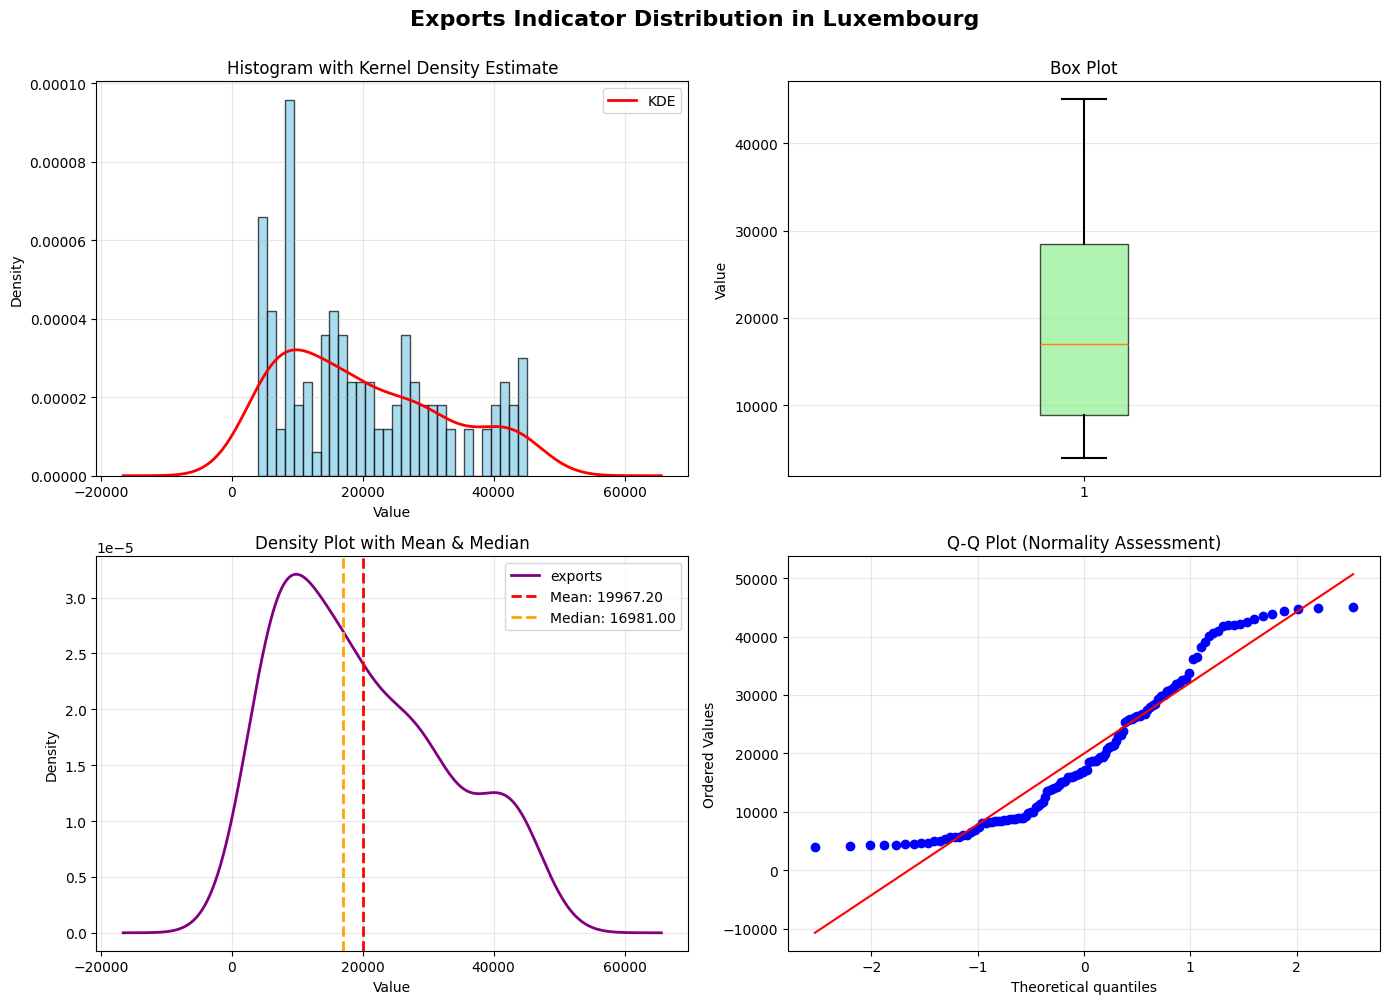


DESCRIPTIVE STATISTICS: exports

Central Tendency:
  Mean:                 19967.2000
  Median:               16981.0000
  Mode:                 3945.5

Spread:
  Std Dev:              12429.4901
  Variance:             154492224.2154
  Range:                41116.8000
  IQR:                  19600.6250
  Coefficient of Var:   0.6225

Extreme Values:
  Min:                  3945.5000
  Max:                  45062.3000
  Q1 (25th percentile): 8806.3500
  Q3 (75th percentile): 28406.9750

Shape:
  Skewness:             0.5544
    → right-skewed (positive skew)
  Kurtosis:             -0.8577
    → light-tailed (platykurtic)

Data Count:
  Total observations:   122
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.0003
    → Data does NOT appear normal (p < 0.05)



In [243]:
# Analysis of the exports indicator distribution
exports_stats = explore_indicator_distribution(cleaned_indicators['exports'], 'exports', title='Exports Indicator Distribution in Luxembourg')

The export is very similar to imports, having the same trend.

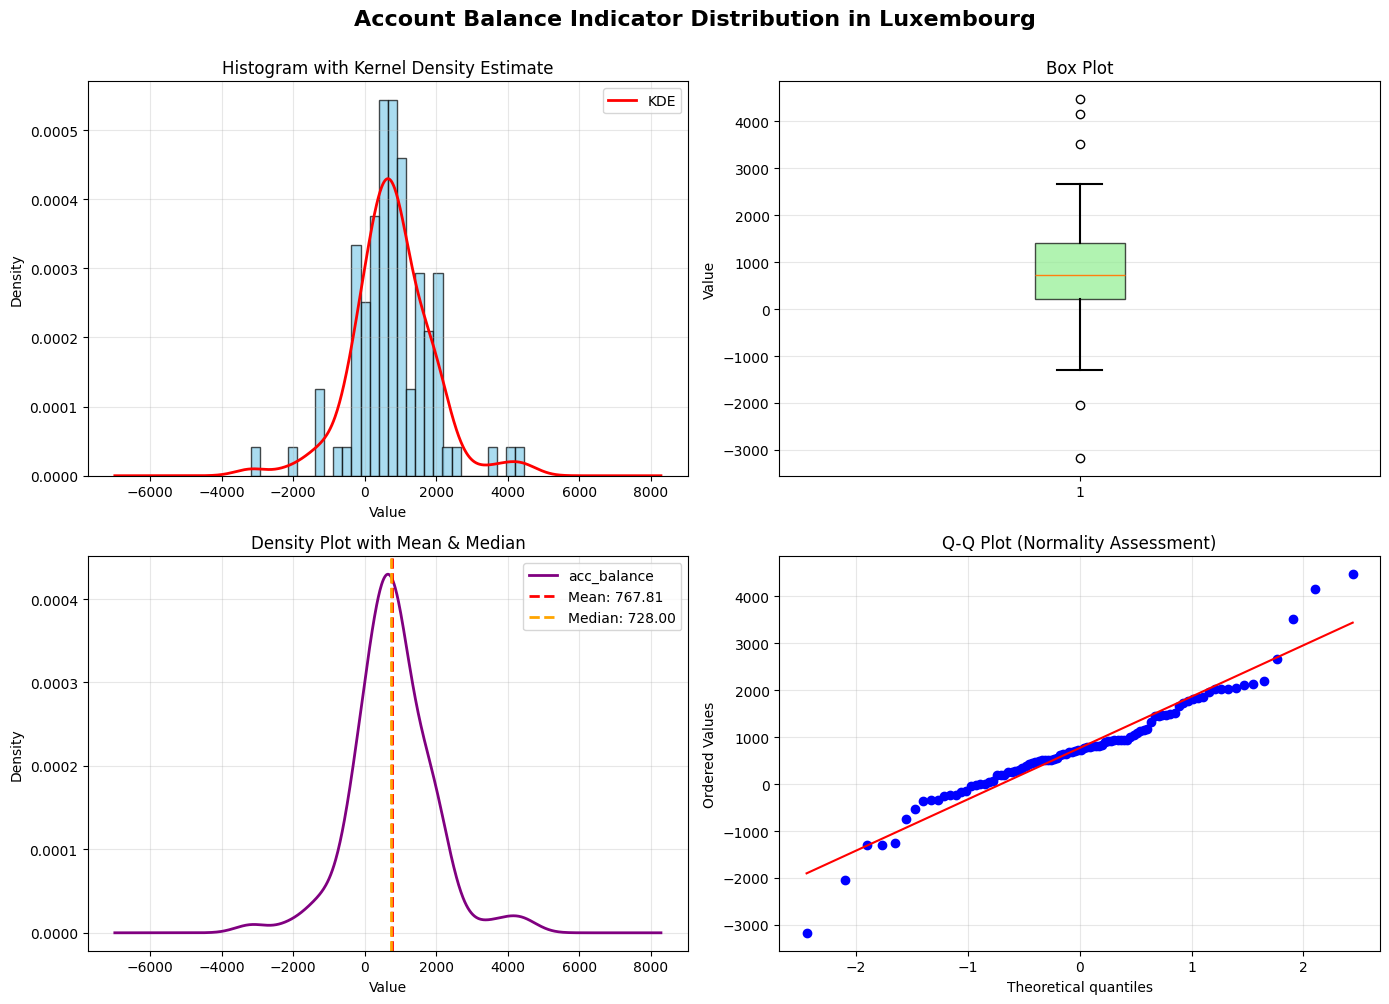


DESCRIPTIVE STATISTICS: acc_balance

Central Tendency:
  Mean:                 767.8085
  Median:               728.0000
  Mode:                 631.0

Spread:
  Std Dev:              1113.0124
  Variance:             1238796.5866
  Range:                7636.0000
  IQR:                  1203.2500
  Coefficient of Var:   1.4496

Extreme Values:
  Min:                  -3168.0000
  Max:                  4468.0000
  Q1 (25th percentile): 209.0000
  Q3 (75th percentile): 1412.2500

Shape:
  Skewness:             0.1266
    → approximately symmetric
  Kurtosis:             2.8474
    → heavy-tailed (leptokurtic)

Data Count:
  Total observations:   94
  Missing values:       0

Normality Test (D'Agostino-Pearson):
  p-value:              0.0050
    → Data does NOT appear normal (p < 0.05)



In [244]:
# Analysis of the account balance indicator distribution
acc_balance_stats = explore_indicator_distribution(cleaned_indicators['acc_balance'], 'acc_balance', title='Account Balance Indicator Distribution in Luxembourg')

There are a few outliers, but these are real data. The Account Balance seems to remain stable over the years with some ups and downs.

#### Bivariate Analysis

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')


def correlation_timeseries_analysis(df, date_column=None, figsize=(16, 12)):
    """
    Comprehensive correlation and time series analysis for a dataframe.
    ... (docstring remains the same)
    """
    
    # Make a copy and prepare data
    data = df.copy()
    
    # Identify numerical columns
    numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove date column if it's in numerical cols
    if date_column and date_column in numerical_cols:
        numerical_cols.remove(date_column)
    
    if len(numerical_cols) < 2:
        raise ValueError("Need at least 2 numerical columns for correlation analysis")
    
    # Prepare time axis
    if date_column and date_column in data.columns:
        time_data = pd.to_datetime(data[date_column])
    else:
        time_data = data.index
    
    # ============ CORRELATION ANALYSIS ============
    print("\n" + "="*70)
    print("CORRELATION ANALYSIS")
    print("="*70)
    
    # Calculate Pearson correlation
    pearson_corr = data[numerical_cols].corr(method='pearson')
    
    # Calculate Spearman correlation (rank-based, more robust to outliers)
    spearman_corr = data[numerical_cols].corr(method='spearman')
    
    print(f"\nAnalyzing {len(numerical_cols)} indicators:")
    print(f"  {', '.join(numerical_cols)}")
    
    # Extract and display correlation pairs
    print("\n" + "-"*70)
    print("PAIRWISE CORRELATIONS (Pearson & Spearman)")
    print("-"*70)
    
    correlation_pairs = []
    for i in range(len(pearson_corr.columns)):
        for j in range(i+1, len(pearson_corr.columns)):
            var1 = pearson_corr.columns[i]
            var2 = pearson_corr.columns[j]
            pearson_val = pearson_corr.iloc[i, j]
            spearman_val = spearman_corr.iloc[i, j]
            
            correlation_pairs.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Pearson': pearson_val,
                'Spearman': spearman_val,
                'Avg': (pearson_val + spearman_val) / 2
            })
    
    corr_df = pd.DataFrame(correlation_pairs)
    corr_df = corr_df.sort_values('Avg', ascending=False, key=abs)
    
    print("\nTop Correlations (sorted by average strength):\n")
    for idx, row in corr_df.iterrows():
        print(f"{row['Variable 1']:15} <-> {row['Variable 2']:15} | "
              f"Pearson: {row['Pearson']:7.4f} | Spearman: {row['Spearman']:7.4f}")
    
    # Interpret correlations
    print("\n" + "-"*70)
    print("CORRELATION INTERPRETATION")
    print("-"*70)
    for idx, row in corr_df.iterrows():
        pearson = row['Pearson']
        spearman = row['Spearman']
        var1, var2 = row['Variable 1'], row['Variable 2']
        
        if abs(pearson) > 0.6:
            strength = "STRONG"
        elif abs(pearson) > 0.35:
            strength = "MODERATE"
        elif abs(pearson) > 0.15:
            strength = "WEAK"
        else:
            strength = "NEGLIGIBLE"
        
        direction = "POSITIVE" if pearson > 0 else "NEGATIVE"
        
        # Check if linear relationship is robust
        if abs(pearson - spearman) > 0.15:
            robustness = "(⚠ Linear relationship may not be robust; outliers may exist)"
        else:
            robustness = "(✓ Relationship is consistent)"
        
        print(f"\n{var1} ↔ {var2}:")
        print(f"  {strength} {direction} correlation {robustness}")
        print(f"  Pearson: {pearson:.4f} | Spearman: {spearman:.4f}")
    
    # ============ VISUALIZATION ============
    
    # 1. CORRELATION HEATMAPS
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    sns.heatmap(pearson_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                square=True, ax=axes[0], cbar_kws={'label': 'Correlation'},
                vmin=-1, vmax=1)
    axes[0].set_title('Pearson Correlation Heatmap', fontsize=14, fontweight='bold')
    
    sns.heatmap(spearman_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                square=True, ax=axes[1], cbar_kws={'label': 'Correlation'},
                vmin=-1, vmax=1)
    axes[1].set_title('Spearman Correlation Heatmap (Rank-Based)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 2. SCATTER PLOTS FOR ALL PAIRS
    num_pairs = len(list(combinations(numerical_cols, 2)))
    num_cols = 3
    num_rows = (num_pairs + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4*num_rows))
    axes = axes.flatten() if num_pairs > 1 else [axes]
    
    pair_idx = 0
    for var1, var2 in combinations(numerical_cols, 2):
        ax = axes[pair_idx]
        
        # Create scatter plot
        ax.scatter(data[var1], data[var2], alpha=0.6, s=50, color='steelblue', edgecolors='navy')
        
        # Add regression line
        z = np.polyfit(data[var1].dropna(), data[var2].dropna(), 1)
        p = np.poly1d(z)
        x_line = np.linspace(data[var1].min(), data[var1].max(), 100)
        ax.plot(x_line, p(x_line), "r--", linewidth=2, label='Trend line')
        
        # Calculate correlation for title
        pearson_val = pearson_corr.loc[var1, var2]
        
        ax.set_xlabel(var1, fontsize=11, fontweight='bold')
        ax.set_ylabel(var2, fontsize=11, fontweight='bold')
        ax.set_title(f'{var1} vs {var2}\nPearson r = {pearson_val:.4f}', 
                    fontsize=11, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        pair_idx += 1
    
    # Hide unused subplots
    for idx in range(pair_idx, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # 3. TIME SERIES PLOTS - INDIVIDUAL INDICATORS
    fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(16, 3*len(numerical_cols)))
    axes = [axes] if len(numerical_cols) == 1 else axes
    
    for idx, col in enumerate(numerical_cols):
        ax = axes[idx]
        
        ax.plot(time_data, data[col], marker='o', linewidth=2, markersize=4, 
               color='steelblue', label=col)
        ax.fill_between(time_data, data[col], alpha=0.3, color='steelblue')
        
        # Add mean line
        mean_val = data[col].mean()
        ax.axhline(y=mean_val, color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: {mean_val:.2f}')
        
        ax.set_ylabel(col, fontsize=11, fontweight='bold')
        ax.set_title(f'Time Series: {col}', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best')
        
        if len(time_data) > 0:
            try:
                if isinstance(time_data.iloc[0], (pd.Timestamp, np.datetime64)):
                    fig.autofmt_xdate()
            except (TypeError, AttributeError):
                pass
    
    axes[-1].set_xlabel('Date', fontsize=11, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 4. TIME SERIES PLOTS - COMBINED (Top Correlations)
    top_5_pairs = corr_df.head(5)
    
    fig, axes = plt.subplots(len(top_5_pairs), 1, figsize=(16, 3.5*len(top_5_pairs)))
    axes = [axes] if len(top_5_pairs) == 1 else axes
    
    for idx, (_, row) in enumerate(top_5_pairs.iterrows()):
        ax = axes[idx]
        var1, var2 = row['Variable 1'], row['Variable 2']
        pearson_val = row['Pearson']
        
        # Normalize both variables to 0-100 for comparison
        var1_norm = (data[var1] - data[var1].min()) / (data[var1].max() - data[var1].min()) * 100
        var2_norm = (data[var2] - data[var2].min()) / (data[var2].max() - data[var2].min()) * 100
        
        ax.plot(time_data, var1_norm, marker='o', linewidth=2, markersize=4,
               label=var1, color='steelblue')
        ax.plot(time_data, var2_norm, marker='s', linewidth=2, markersize=4,
               label=var2, color='coral')
        
        ax.set_ylabel('Normalized Value (0-100)', fontsize=11, fontweight='bold')
        ax.set_title(f'{var1} vs {var2} (Normalized) | Pearson r = {pearson_val:.4f}',
                    fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best', fontsize=10)

        if len(time_data) > 0:
            try:
                if isinstance(time_data.iloc[0], (pd.Timestamp, np.datetime64)):
                    fig.autofmt_xdate()
            except (TypeError, AttributeError):
                pass
    
    axes[-1].set_xlabel('Date', fontsize=11, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 5. CORRELATION STRENGTH DISTRIBUTION
    fig, ax = plt.subplots(figsize=(12, 6))
    
    corr_values = corr_df['Pearson'].abs().values
    colors = ['red' if x > 0.7 else 'orange' if x > 0.5 else 'yellow' if x > 0.3 else 'green' 
              for x in corr_values]
    
    bars = ax.barh(range(len(corr_df)), corr_values, color=colors, alpha=0.7, edgecolor='black')
    ax.set_yticks(range(len(corr_df)))
    ax.set_yticklabels([f"{row['Variable 1']} ↔ {row['Variable 2']}" 
                        for _, row in corr_df.iterrows()], fontsize=10)
    ax.set_xlabel('Absolute Correlation Strength', fontsize=11, fontweight='bold')
    ax.set_title('Correlation Strength Comparison (Pearson)', fontsize=13, fontweight='bold')
    ax.set_xlim(0, 1)
    
    # Add strength zones
    ax.axvline(x=0.6, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Strong (>0.60)')
    ax.axvline(x=0.35, color='orange', linestyle='--', alpha=0.5, linewidth=2, label='Moderate (>0.35)')
    ax.axvline(x=0.15, color='yellow', linestyle='--', alpha=0.5, linewidth=2, label='Weak (>0.15)')
    
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    # 6. SUMMARY STATISTICS TABLE
    print("\n" + "="*70)
    print("SUMMARY STATISTICS")
    print("="*70)
    print(data[numerical_cols].describe().to_string())
    
    # Prepare return dictionary
    results = {
        'pearson_correlation': pearson_corr,
        'spearman_correlation': spearman_corr,
        'correlation_pairs': corr_df,
        'summary_statistics': data[numerical_cols].describe(),
        'numerical_columns': numerical_cols,
        'data': data
    }
    
    print("\n" + "="*70)
    print("ANALYSIS COMPLETE")
    print("="*70)
    
    return results


CORRELATION ANALYSIS

Analyzing 6 indicators:
  inflation, unemployment, life_expectancy, gdp_per_capita, emigration_rate_per_1000, population_growth_rate

----------------------------------------------------------------------
PAIRWISE CORRELATIONS (Pearson & Spearman)
----------------------------------------------------------------------

Top Correlations (sorted by average strength):

life_expectancy <-> gdp_per_capita  | Pearson:  0.9516 | Spearman:  0.9492
unemployment    <-> life_expectancy | Pearson:  0.8493 | Spearman:  0.7747
unemployment    <-> gdp_per_capita  | Pearson:  0.7693 | Spearman:  0.7594
gdp_per_capita  <-> emigration_rate_per_1000 | Pearson:  0.7691 | Spearman:  0.7424
unemployment    <-> population_growth_rate | Pearson:  0.7409 | Spearman:  0.7684
life_expectancy <-> emigration_rate_per_1000 | Pearson:  0.7112 | Spearman:  0.7487
life_expectancy <-> population_growth_rate | Pearson:  0.7683 | Spearman:  0.6896
gdp_per_capita  <-> population_growth_rate | Pearson

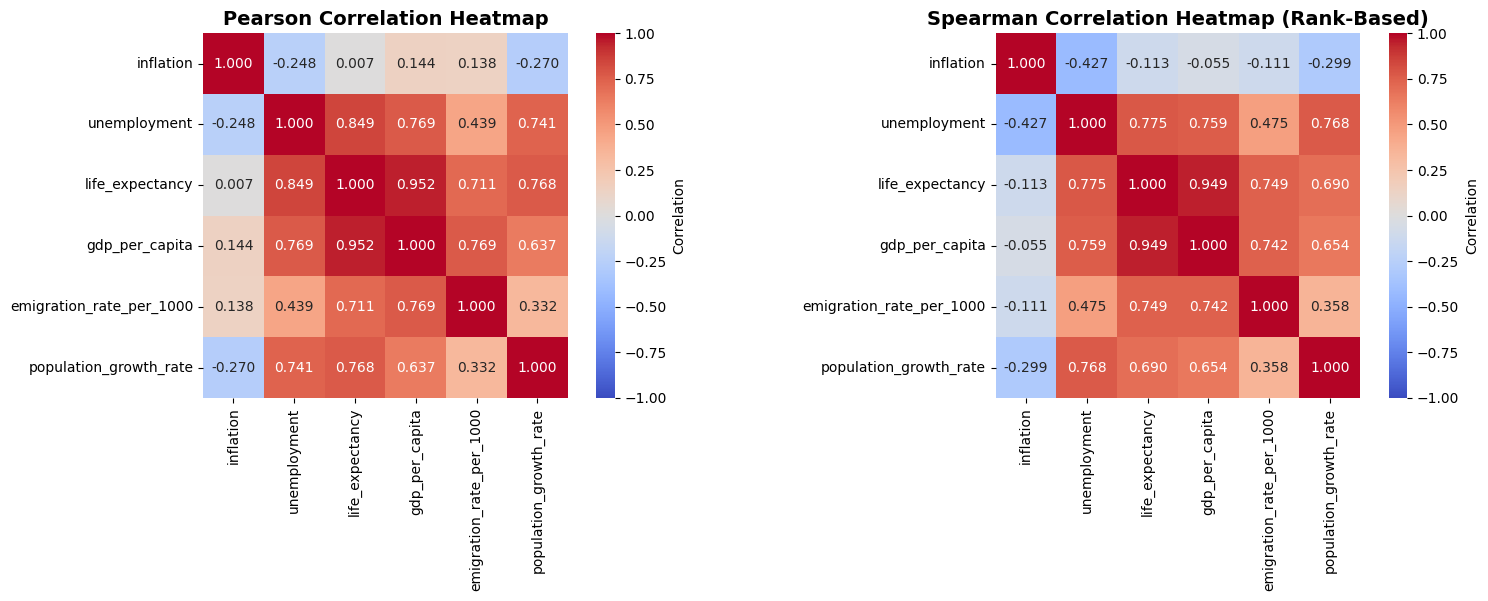

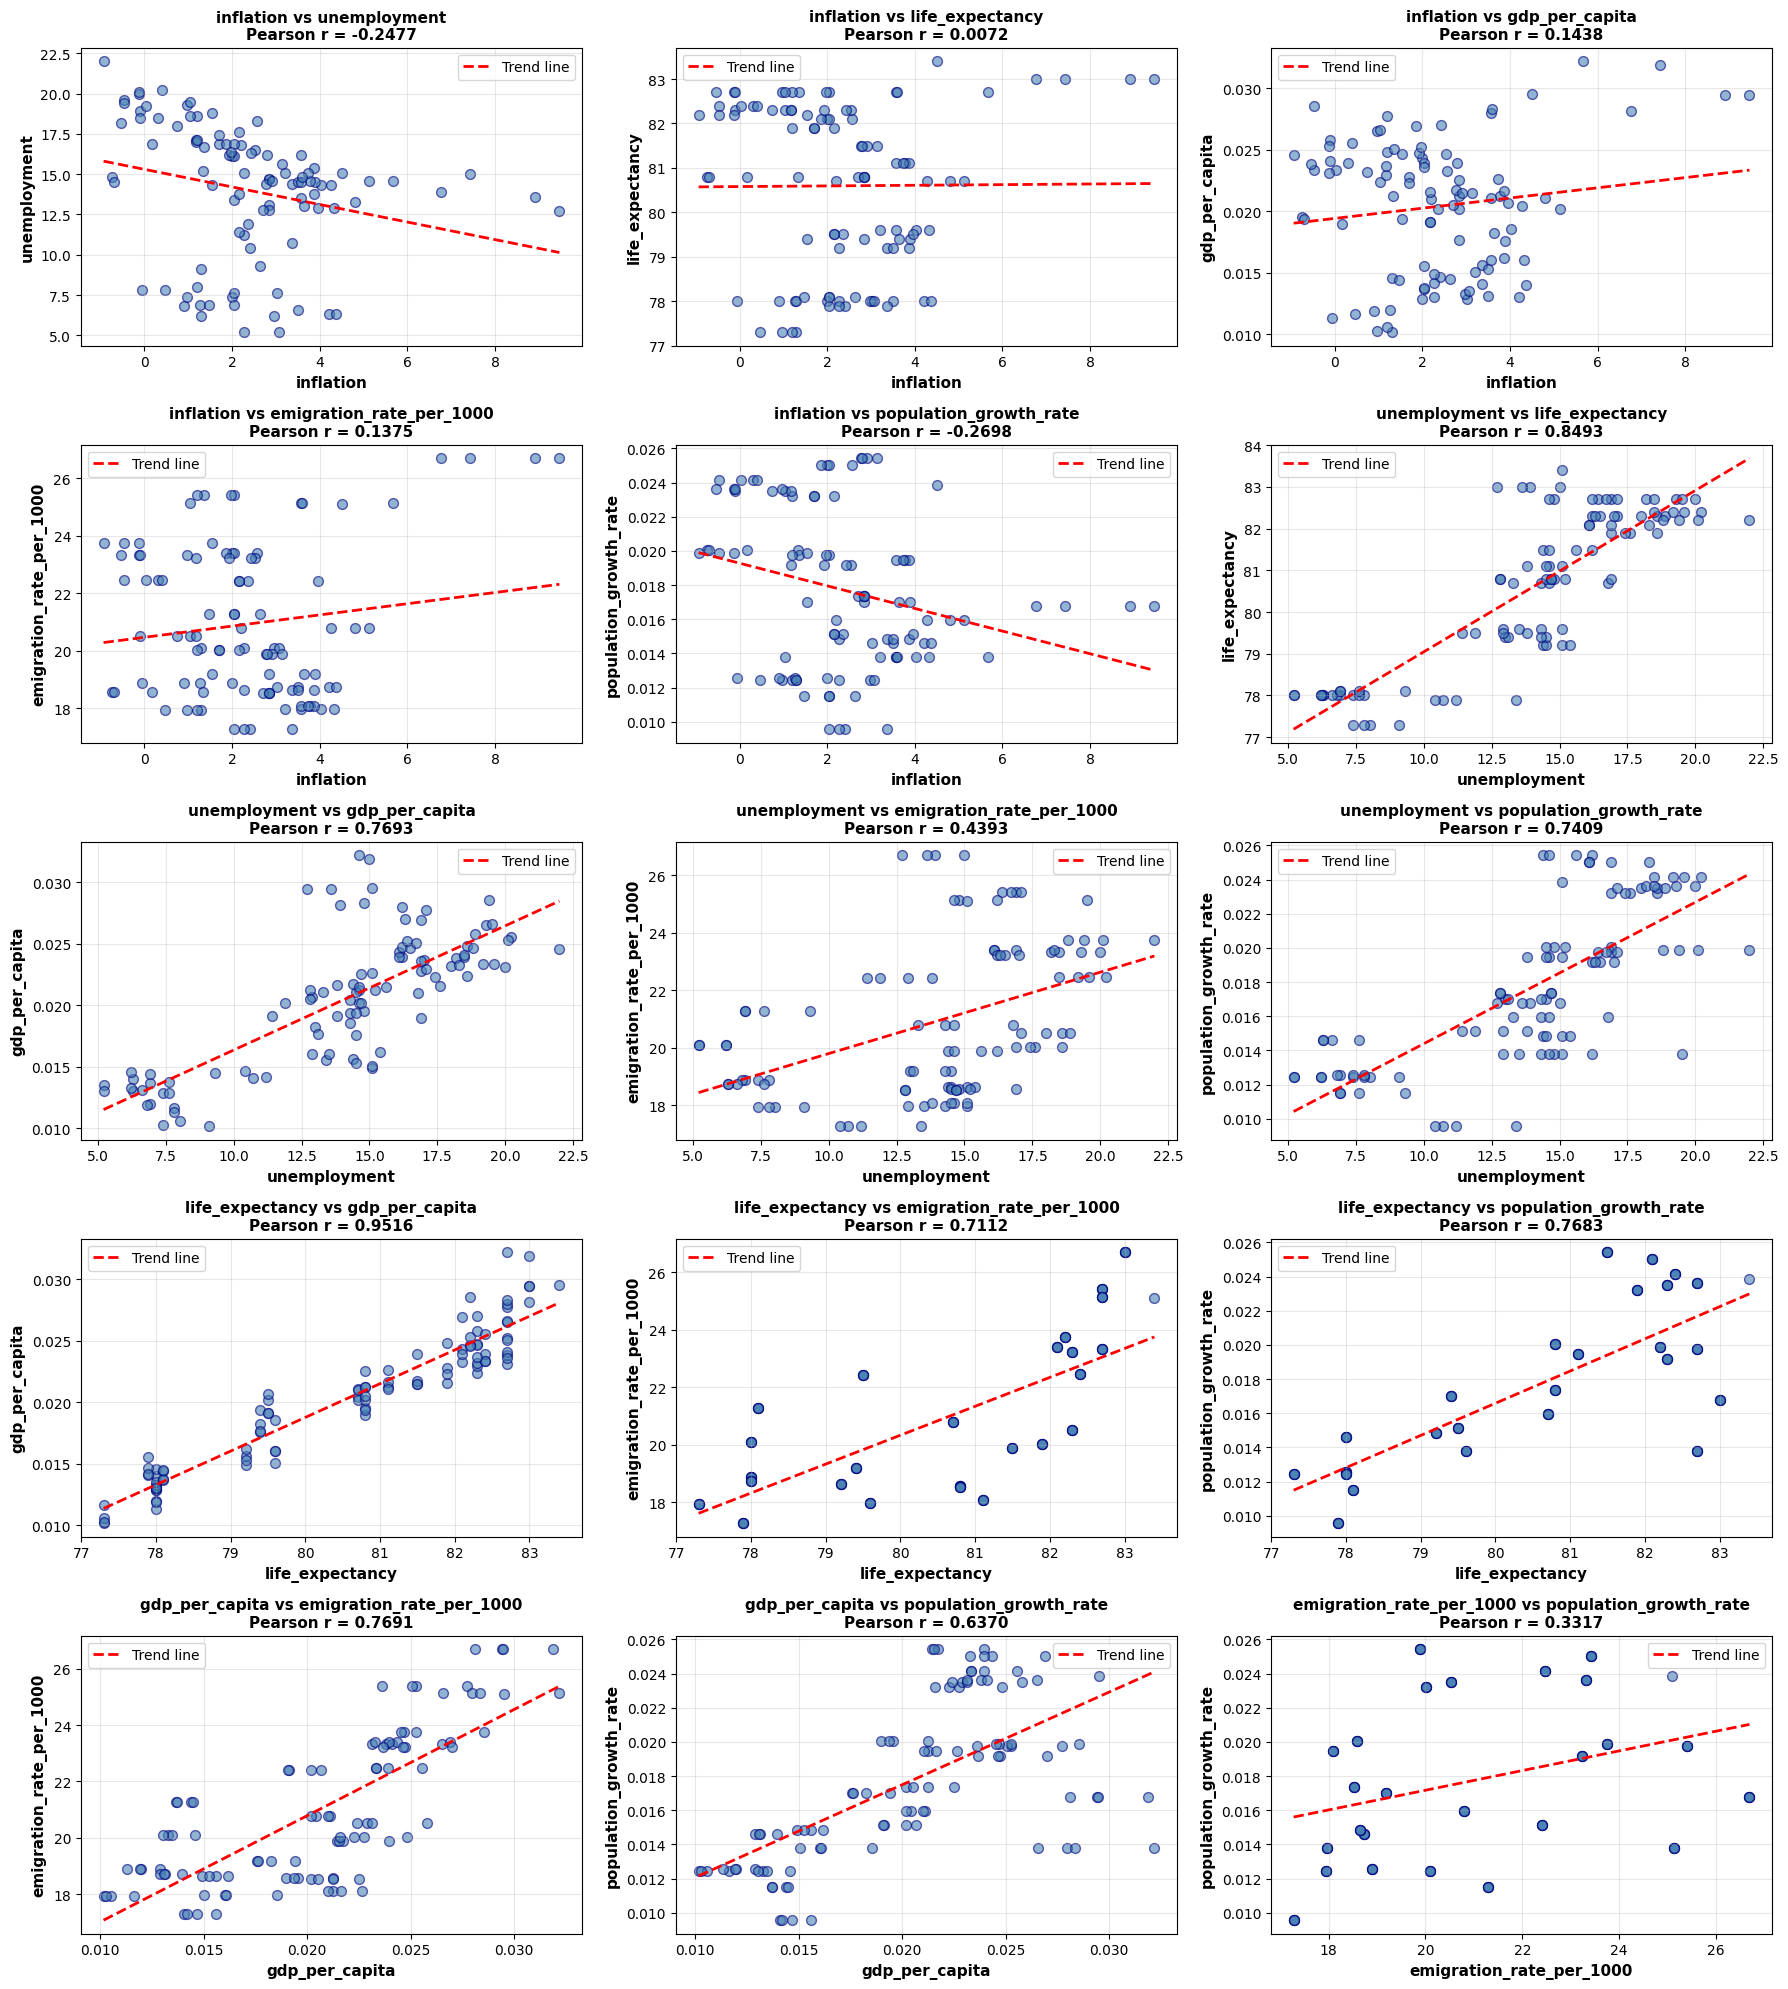

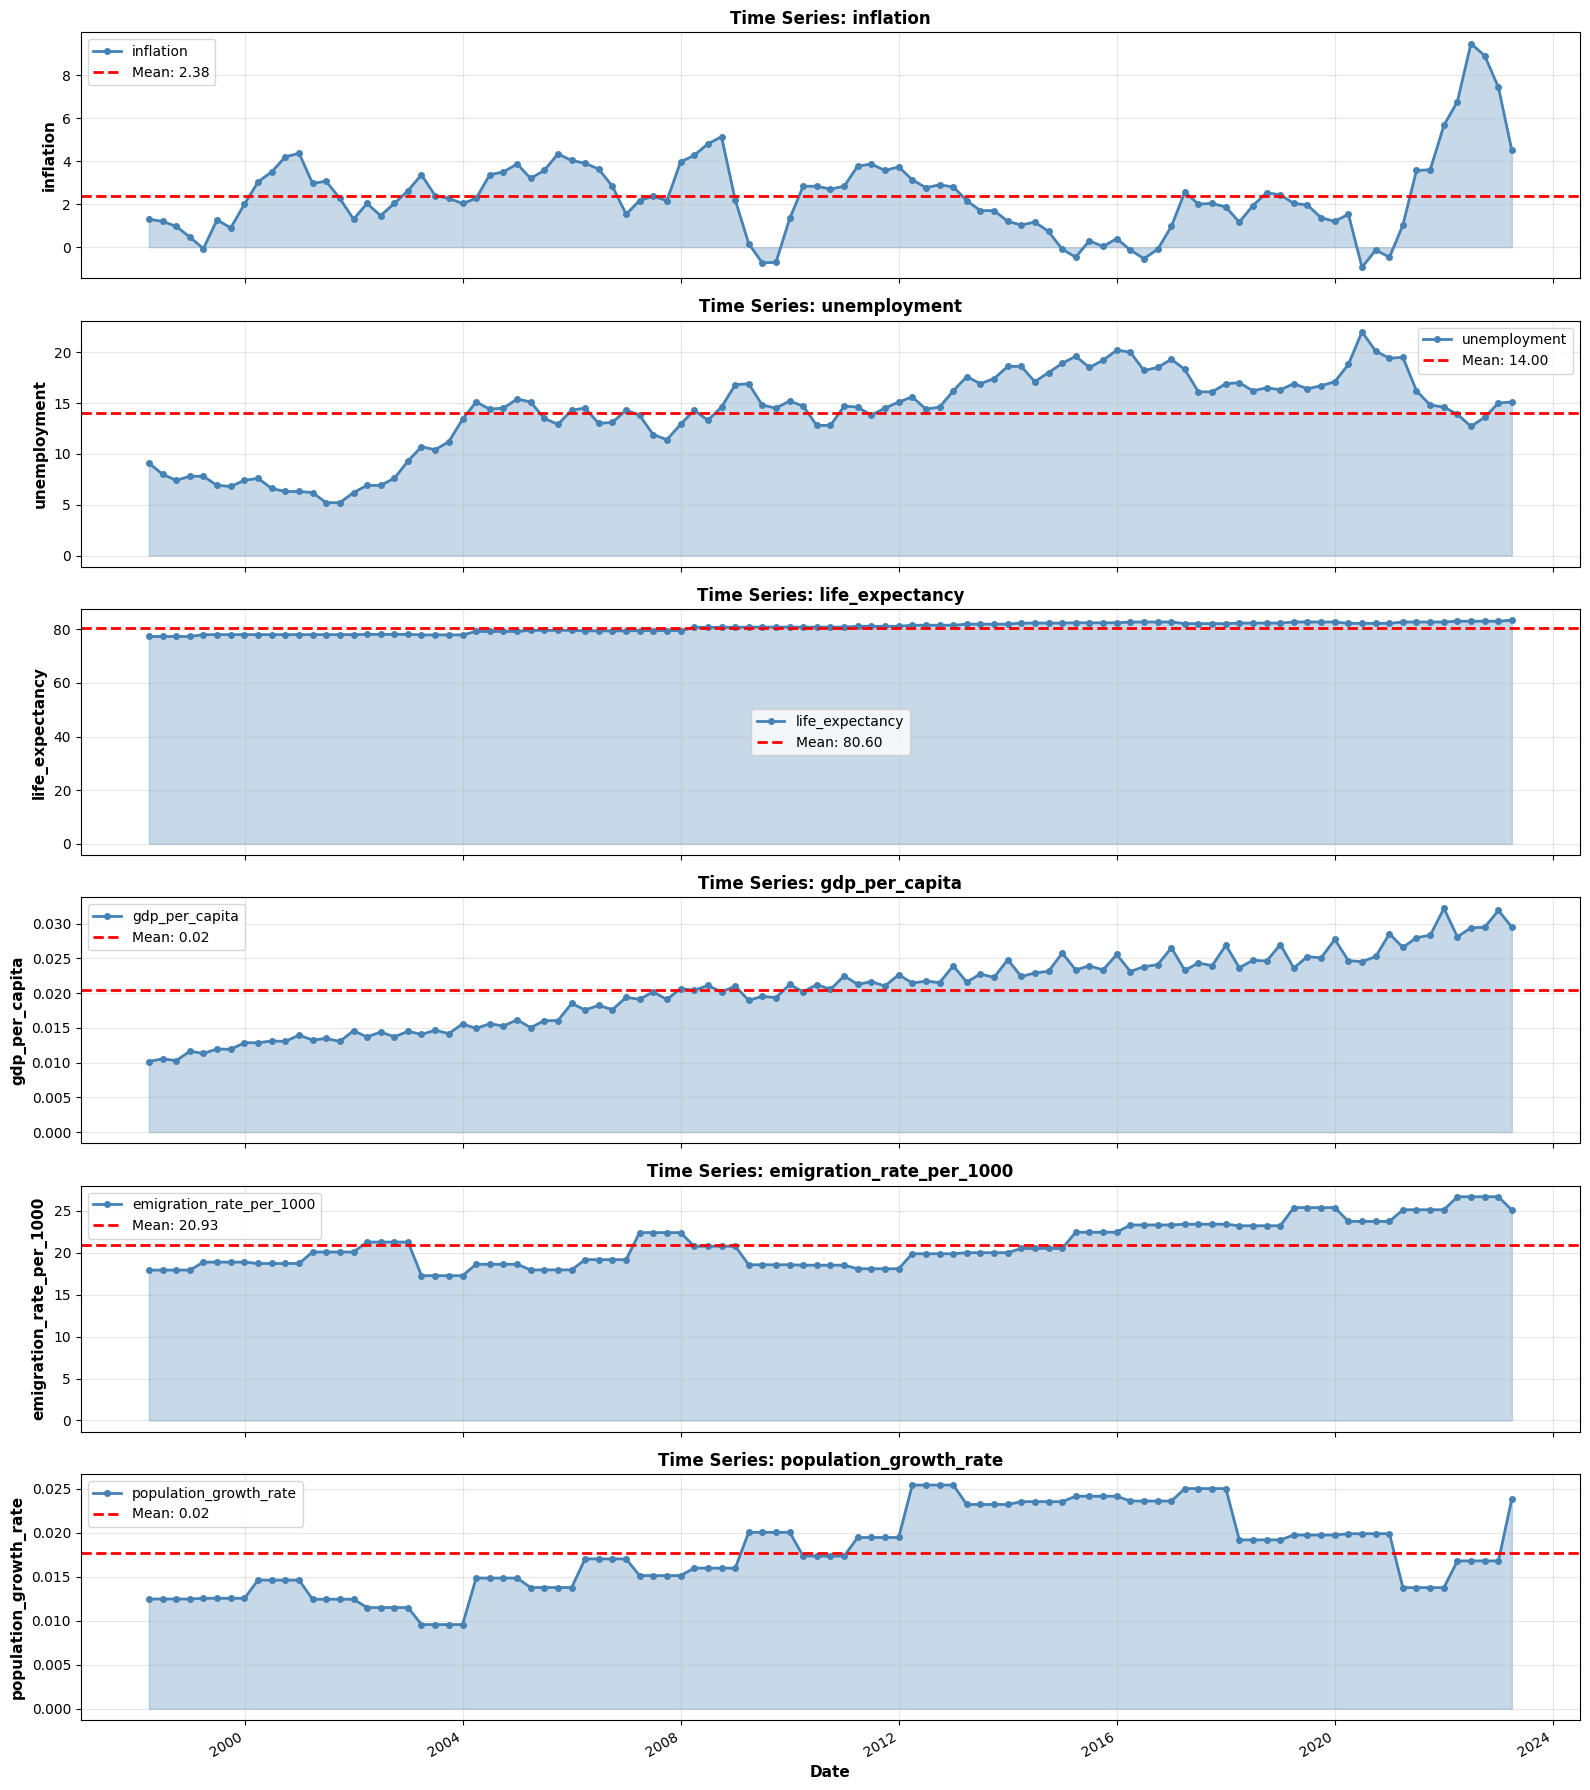

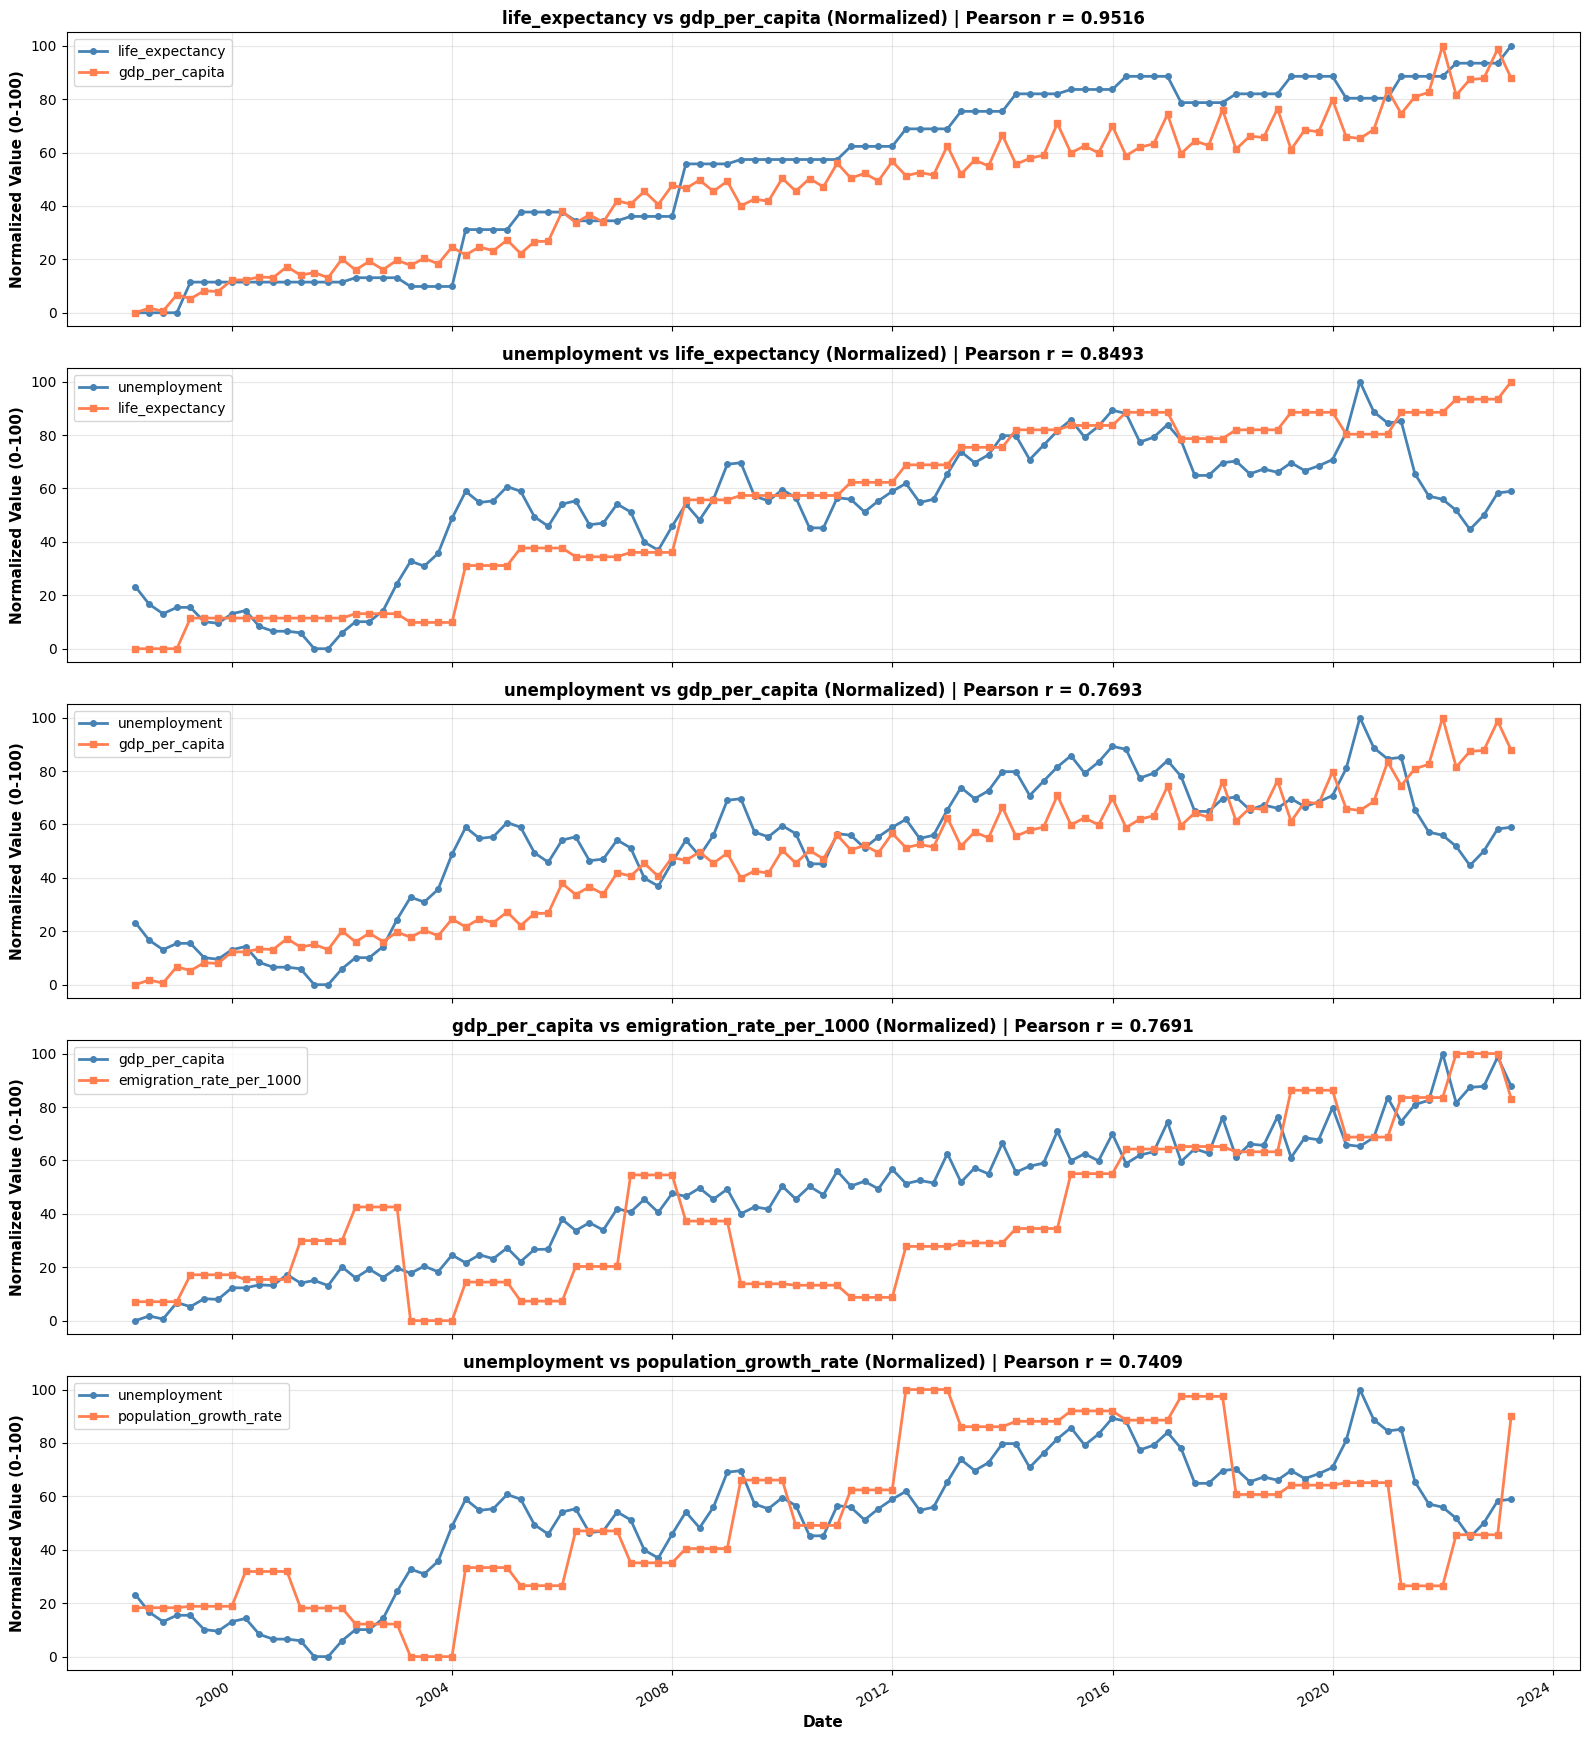

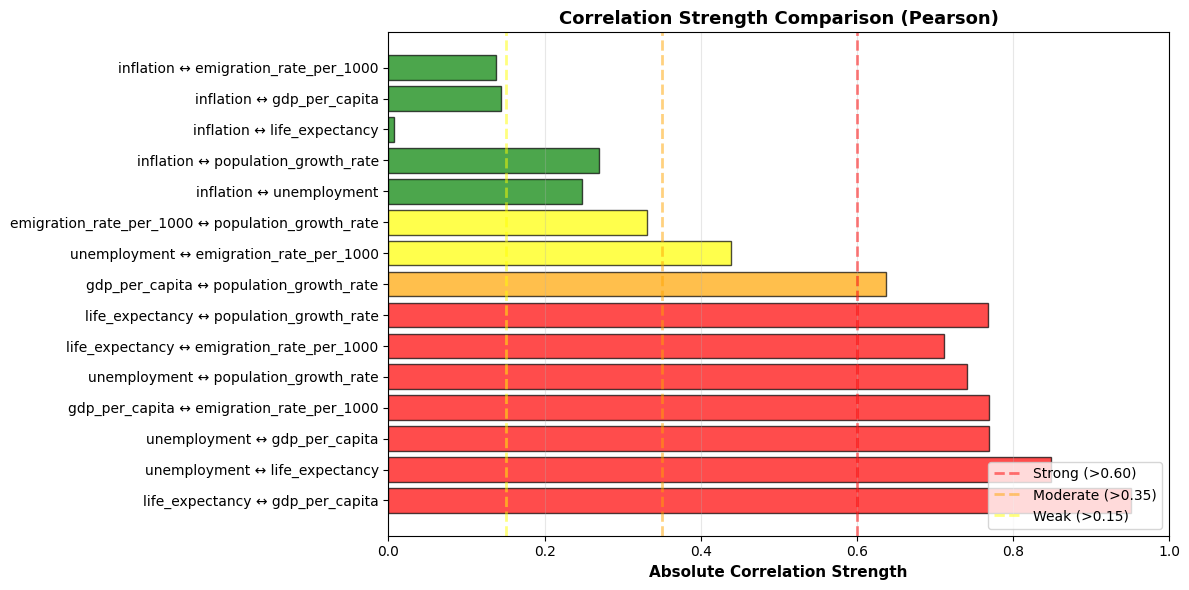


SUMMARY STATISTICS
        inflation  unemployment  life_expectancy  gdp_per_capita  emigration_rate_per_1000  population_growth_rate
count  101.000000     101.00000       101.000000      101.000000                101.000000              101.000000
mean     2.375908      14.00297        80.596040        0.020396                 20.933549                0.017711
std      1.873049       4.11921         1.875522        0.005402                  2.649558                0.004599
min     -0.933333       5.20000        77.300000        0.010165                 17.278608                0.009571
25%      1.200000      12.70000        79.200000        0.015272                 18.639001                0.013781
50%      2.200000      14.60000        80.800000        0.021233                 20.100228                0.017033
75%      3.500000      16.90000        82.300000        0.024090                 23.230704                0.020052
max      9.466667      22.00000        83.400000        0.03

In [252]:
# Bivariate Analysis for Inflation, Unemployment, GDP, Emigration, Life Expectancy, Population

# Convert all to dataframes with Date index, dropping Region column
inflation_df = pd.DataFrame(cleaned_indicators['inflation']).set_index('Date')[['inflation']].apply(pd.to_numeric, errors='coerce')
unemployment_df = pd.DataFrame(cleaned_indicators['unemployment']).set_index('Date')[['unemployment']].apply(pd.to_numeric, errors='coerce')
gdp_df = pd.DataFrame(cleaned_indicators['gdp']).set_index('Date')[['gdp']].apply(pd.to_numeric, errors='coerce')
emigration_df = pd.DataFrame(cleaned_indicators['emigration']).set_index('Date')[['emigration']].apply(pd.to_numeric, errors='coerce')
life_expectancy_df = pd.DataFrame(cleaned_indicators['life_expectancy']).set_index('Date')[['life_expectancy']].apply(pd.to_numeric, errors='coerce')
population_df = pd.DataFrame(cleaned_indicators['population']).set_index('Date')[['population']].apply(pd.to_numeric, errors='coerce')

# Resample to quarterly frequency
inflation_q = inflation_df.resample('Q').mean() 
unemployment_q = unemployment_df.resample('Q').sum() 
gdp_q = gdp_df.resample('Q').first()
emigration_q = emigration_df.resample('Q').first().fillna(method='ffill')
life_expectancy_q = life_expectancy_df.resample('Q').first().fillna(method='ffill')
population_q = population_df.resample('Q').first().fillna(method='ffill')

# Merge all together
bivariate_data = pd.concat([
    inflation_q,
    unemployment_q,
    gdp_q,
    emigration_q,
    life_expectancy_q,
    population_q
], axis=1)

# Reset index to make Date a column
bivariate_data = bivariate_data.reset_index()

# Remove rows with any missing values
bivariate_data = bivariate_data.dropna()

# GDP per Capita (real economic productivity)
bivariate_data['gdp_per_capita'] = bivariate_data['gdp'] / bivariate_data['population']

# Emigration Rate (emigrants per 1,000 population)
bivariate_data['emigration_rate_per_1000'] = (bivariate_data['emigration'] / bivariate_data['population']) * 1000

# Pupulation Growth Rate (percentage)
bivariate_data['population_growth_rate'] = bivariate_data['population'].pct_change(periods=4)

# Drop original gdp, emigration, population columns
bivariate_data = bivariate_data.drop(columns=['gdp', 'emigration', 'population'])

# Remove rows with any missing values
bivariate_data = bivariate_data.dropna()

# bivariate_data.info()

# Run correlation and time series analysis
bivariate_results = correlation_timeseries_analysis(bivariate_data, date_column='Date')


##### **Economic Analysis: Key Findings**

##### Strongest Correlations (Real Economic Relationships)

**Life Expectancy ↔ GDP per Capita (r = 0.95)**
- Wealth enables healthcare improvements
- Steady upward trend 1995-2024
- **Interpretation**: Economic development directly improves living standards

**Unemployment ↔ Life Expectancy (r = 0.85)**
- Counterintuitive: unemployment rises, yet life expectancy improves
- **Interpretation**: Healthcare is resilient; investments maintained even during crises (2008, 2020)

 **Unemployment ↔ GDP per Capita (r = 0.77)**
- Growth and joblessness increase together
- Should be negative in healthy economies
- **Interpretation**: "Jobless growth"—productivity gains, not job creation

**GDP per Capita ↔ Emigration Rate (r = 0.77)**
- Wealthier people emigrate more
- **Interpretation**: Brain drain—opportunity-driven migration, not desperation

---

##### Moderate Correlations (Policy-Relevant)

**nemployment ↔ Population Growth (r = 0.74)**
- Population grows faster than job creation
- **Interpretation**: Labor market cannot absorb demographic expansion

**Life Expectancy ↔ Emigration Rate (r = 0.71)**
- Healthier populations leave more
- **Interpretation**: Health infrastructure enables mobility; self-selection of capable individuals

---

##### Weak/Negligible Correlations

**Inflation ↔ Everything (<0.27)**
- Spikes in 2008 and 2022 (global shocks)
- No correlation with domestic economics
- **Interpretation**: Inflation is external; domestic policy cannot control it

---

##### **Temporal Breakdown**

| Period | Key Pattern | Interpretation |
|--------|-------------|-----------------|
| **Pre-2008** | Steady growth, unemployment 5-10% | Normal expansion |
| **2008-2010** | Unemployment → 22%, emigration continues | Labor collapse but emigration persists = opportunity-driven |
| **2015-2019** | Recovery: unemployment falls to 13%, GDP peaks | Strong rebound |
| **2020-2024** | Unemployment ~13%, life expectancy peaks, emigration stable | Post-COVID tightening; emigration structural |

---

##### **Three Core Insights**

**1. Economic Growth Without Job Creation**
GDP per capita up 3x, but unemployment stayed elevated. Wealth concentrates.

**2. Emigration is Rational**
Not fleeing poverty, but seeking better opportunities abroad. Capable citizens leave.

**3. Population Growth is the Hidden Driver**
Even normalized, population growth (r = 0.74 with unemployment, r = 0.78 with life expectancy) shapes all outcomes. Demographic pressure exceeds institutional capacity.

---

##### **Summary Statistics**

| Metric | Mean | Min | Max | Interpretation |
|--------|------|-----|-----|-----------------|
| **Inflation (%)** | 2.38 | -0.93 | 9.47 | Volatile, external shocks |
| **Unemployment (%)** | 14.00 | 5.20 | 22.00 | Elevated, structural issues |
| **Life Expectancy (years)** | 80.60 | 77.30 | 83.40 | Improving, resilient |
| **GDP per Capita (€)** | 0.0204 | 0.0102 | 0.0322 | 3x growth over 25 years |
| **Emigration Rate (per 1,000)** | 20.93 | 17.28 | 26.69 | High, increasing |
| **Population Growth (%)** | 1.77 | 0.96 | 2.54 | Moderate, volatile |

---